#### KÜTÜPHANE TANIMLAMALARI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import missingno as msno

#### TERMİNAL DÜZENLEMELERİ

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

### ANALİZ FONKSİYONLARIM

In [3]:
## VERİ SETİ YÜKLEME FONKSİYONU
def load(file_path):
    data = pd.read_csv(file_path)
    return data

In [4]:
## VERİ TANIMA FONKSİYONU
def check_df(dataframe,head=5):
    print("############### SHAPE ######################")
    print(dataframe.shape)
    print("############### INDEX ######################")
    print(dataframe.index)
    print("############### TYPES ######################")
    print(dataframe.dtypes)
    print("############### HEAD ######################")
    print(dataframe.head(head))
    print("############### TAIL ######################")
    print(dataframe.tail(head))
    print("############### NULL ######################")
    print(dataframe.isnull().sum())
    print("############### QUANTILES ######################")
    print(dataframe.describe([0.05, 0.5, 0.25, 0.95, 0.99,]).T)

In [5]:
## KATEGORİK-NUMERİK DEĞİŞKENLERİ BELİRLEME FONKSİYONU
def grab_col_names(dataframe, cat_th=85, car_th=90):
    # kategorik değişkenler
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    # sayısal gibi görünen kategorik değişkenler
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    
    # kardinal değişkenler
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat # num but cat olanlar kategorik sayılacağı için ekledik
    # son olarak varsa kardinal değişkenleri cat collar içinden çıkarıyoruz
    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [6]:
## KATEGORİK DEĞİŞKENLERİN VERİ SETİNDEKİ DAĞILIMLARINI İNCELEME FONKSİYONU
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("********************************************")
    if plot:
        sns.countplot(x= dataframe[col_name], data= dataframe)
        plt.show(block=True)

In [7]:
## NUMERİK DEĞİŞKENLERİN İSTATİSTİKLERİNİ İNCELEME FONKSİYONU
def num_summary(dataframe, numerical_col, plot=False):
    quantiles= [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
        print("**************************************")

In [8]:
## KATEGORİK DEĞİŞKENLERİN HEDEF DEĞİŞKENLE İLİŞKİSİNİ İNCELEME FONKSİYONU
def target_summary_with_cat(dataframe, target, categorical_col, plot = False):
    print({"TARGET MEAN": pd.DataFrame(dataframe.groupby(categorical_col)[target].mean())})
    if plot:
        # bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x=categorical_col, y=target, data=df, estimator=np.mean)
        plt.title(f'{categorical_col} Kategorileri İçin Ortalama {target}')
        plt.show()
        print("*******************************************")
        # box plot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=categorical_col, y=target, data=df)
        plt.title(f'{categorical_col} Kategorileri İçin Ortalama {target}')
        plt.show()
        print("*******************************************")
        # violin plot
        plt.figure(figsize=(10, 6))
        sns.violinplot(x=categorical_col, y=target, data=df)
        plt.title(f'{categorical_col} Kategorileri İçin Ortalama {target}')
        plt.show()
        print("*******************************************")
        #strip plot
        plt.figure(figsize=(10, 6))
        sns.stripplot(x=categorical_col, y=target, data=df, jitter=True)
        plt.title(f'{categorical_col} Kategorileri İçin Ortalama {target}')
        plt.show()
        print("*******************************************")

In [9]:
## NUMERİK DEĞİŞKENLERİN HEDEF DEĞİŞKENLE İLİŞKİSİNİ İNCELEME FONKSİYONU
def target_summary_with_num(dataframe,target,numerical_col, plot = False):
    #print(pd.DataFrame(df.groupby(target).agg({numerical_col:"mean"})), end="\n\n\n")
    if plot:
        # scatter plot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=numerical_col, y=target, data=df)
        plt.title(f'{numerical_col} ve {target}')
        plt.show()

In [10]:
## KORELASYONLARI TESPİT ETME FONKSİYONU
def high_correlated_cols(dataframe, cor_th= 0.80, plot=False):
    corr = dataframe.corr(numeric_only= True)
    cor_matrix = corr.abs() #negatif veya pozitif korelasyon fark etmediği için mutlak değerlerini alıyorum öncelikle
    upper_triangle_matrix=cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool)) # oluşturduğumuz matriste 0.75'den büyük korelasyonu olan değişkenleri seçip drop_list'e attık.
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > cor_th)] #oluşturduğumuz matriste 0.9'dan büyük korelasyonu olan değişkenleri seçip drop_list'e attık.
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={"figure.figsize": (15, 15)})
        mask = np.triu(np.ones_like(corr, dtype=bool))
        sns.heatmap(corr, cmap="coolwarm", annot= True, mask=mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
        plt.show()
    return drop_list

In [11]:
## EKSİK DEĞER BARINDIRAN DEĞİŞKENLERİ VE ORANLARINI TESPİT ETME FONKSİYONU
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [12]:
## OUTLIER TESPİT ETME FONKSİYONLARI
def outlier_thresholds(dataframe, col_name, q1=0.1, q3=0.98, plot=True):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    if plot:
        #boxplot
        plt.figure(figsize=(12,4))
        sns.boxplot(df[col_name], orient='h')
        plt.xlabel(col_name)
        plt.title(f'Box plot of {col_name}')
        plt.show()    
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [13]:
## LABEL ENCODER FONKSİYONU
def label_encoder(dataframe, cols):
    labelencoder = LabelEncoder()
    dataframe[cols] = labelencoder.fit_transform(dataframe[cols])
    return dataframe

In [14]:
## ONE HOT ENCODER FONKSİYONU
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

***********

### VERİYE GENEL BAKIŞ VE İLK DÜZENLEMELER

In [15]:
file_path= "walmart.csv"
df= load(file_path)
df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5     CPI  Unemployment Type    Size
0      1     1  2010-02-05     24924.500      False       42.310       2.572        NaN        NaN        NaN        NaN        NaN 211.096         8.106    A  151315
1      1     1  2010-02-12     46039.490       True       38.510       2.548        NaN        NaN        NaN        NaN        NaN 211.242         8.106    A  151315
2      1     1  2010-02-19     41595.550      False       39.930       2.514        NaN        NaN        NaN        NaN        NaN 211.289         8.106    A  151315
3      1     1  2010-02-26     19403.540      False       46.630       2.561        NaN        NaN        NaN        NaN        NaN 211.320         8.106    A  151315
4      1     1  2010-03-05     21827.900      False       46.500       2.625        NaN        NaN        NaN        NaN        NaN 211.350         8.106    A  151315

###### DATE DEĞİŞKENİNİN DÖNÜŞÜMÜ

In [16]:
# Date kolonunu datetime formatına çevirelim
df['Date'] = pd.to_datetime(df['Date'])

Veri setinde tarihler günlük tutulmadığı, haftalık tutulduğu için en küçük birimim hafta. Yeni kolonları da buna göre oluşturabilirim.

In [17]:
def determine_week_of_month(date):
    day = date.day
    if 1 <= day <= 7:
        return 1
    elif 8 <= day <= 14:
        return 2
    elif 15 <= day <= 21:
        return 3
    elif 22 <= day <= 31:
        return 4

In [18]:
df['Day'] = df['Date'].dt.day 
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['WeekOfYear'] = df['Date'].dt.isocalendar().week # yılın kaçıncı haftası
df['WeekOfMonth'] = df['Date'].apply(determine_week_of_month) #ayın kaçıncı haftası
df['Quarter'] = df['Date'].dt.quarter # yılın kaçıncı çeyreği
df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5     CPI  Unemployment Type    Size  Day  Month  Year  WeekOfYear  WeekOfMonth  Quarter
0      1     1 2010-02-05     24924.500      False       42.310       2.572        NaN        NaN        NaN        NaN        NaN 211.096         8.106    A  151315    5      2  2010           5            1        1
1      1     1 2010-02-12     46039.490       True       38.510       2.548        NaN        NaN        NaN        NaN        NaN 211.242         8.106    A  151315   12      2  2010           6            2        1
2      1     1 2010-02-19     41595.550      False       39.930       2.514        NaN        NaN        NaN        NaN        NaN 211.289         8.106    A  151315   19      2  2010           7            3        1
3      1     1 2010-02-26     19403.540      False       46.630       2.561        NaN        NaN        NaN        NaN        NaN 211.320         8.106    A  151315   26      2  2010           8            4        1
4      1     1 2010-03-05     21827.900      False       46.500       2.625        NaN        NaN        NaN        NaN        NaN 211.350         8.106    A  151315    5      3  2010           9            1        1

In [19]:
check_df(df)

############### SHAPE ######################
(421570, 22)
############### INDEX ######################
RangeIndex(start=0, stop=421570, step=1)
############### TYPES ######################
Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
Day                      int32
Month                    int32
Year                     int32
WeekOfYear              UInt32
WeekOfMonth              int64
Quarter                  int32
dtype: object
############### HEAD ######################
   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_P

###### KATEGORİK-NUMERİK AYRIMI

In [20]:
# Önce cat_th ve car_th belirlemek için kolonlarımızdaki unique değer sayısına bakalım.
for col in df.columns:
    print(col, df[col].nunique())

Store 45
Dept 81
Date 143
Weekly_Sales 359464
IsHoliday 2
Temperature 3528
Fuel_Price 892
MarkDown1 2277
MarkDown2 1499
MarkDown3 1662
MarkDown4 1944
MarkDown5 2293
CPI 2145
Unemployment 349
Type 3
Size 40
Day 31
Month 12
Year 3
WeekOfYear 52
WeekOfMonth 4
Quarter 4


**GÖZLEMLER ve ÇIKARIMLAR**
* Büyük bir veri seti olduğu için threshold'ları veriye göre belirledim ve dolayısıyla yüksekler. 
* Manuel incelediğimde mantıken Store(45), Dept(81), Type(3), IsHoliday(2) kategorik görünüyor. Day, Month, Year da kategorik.
* Değişkenlerin neyi ifade ettiğini bildiğimiz için diğerlerinin sayısal olduğunu da tahmin edebiliyoruz.
* Size-> mağazanın büyüklüğü. Sayısal bir veri fakat unique değer sayısı düşük. Mağaza sayısı 45 iken 40 değer olması normal.
* Bu sebeple Size değişkeni threshold altında kalsa da numerik olarak alacağım.

In [21]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 421570
Variables: 22
cat_cols: 11
num_cols: 11
cat_but_car: 0
num_but_cat: 10


In [22]:
cat_cols

['Type',
 'Store',
 'Dept',
 'IsHoliday',
 'Size',
 'Day',
 'Month',
 'Year',
 'WeekOfYear',
 'WeekOfMonth',
 'Quarter']

In [23]:
num_cols

['Date',
 'Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

In [24]:
cat_but_car

[]

In [25]:
num_cols.append("Size")
cat_cols.remove("Size") 
num_cols.remove("Date")

******************

### DEĞİŞKENLERİN VERİ SETİNDE DAĞILIMINI GÖRSELLEŞTİRME

#### KATEGORİK DEĞİŞKENLERİ İNCELEME VE GÖRSELLEŞTİRME

In [26]:
# öncelikle görselleştirebilmek için kategorik bool değişkenlere bir dönüşüm uygulayalım
for col in df.columns:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)

        Type  Ratio
Type               
A     215478 51.113
B     163495 38.782
C      42597 10.104
********************************************


       Store  Ratio
Store              
13     10474  2.485
10     10315  2.447
4      10272  2.437
1      10244  2.430
2      10238  2.429
24     10228  2.426
27     10225  2.425
34     10224  2.425
20     10214  2.423
6      10211  2.422
32     10202  2.420
19     10148  2.407
31     10142  2.406
28     10113  2.399
41     10088  2.393
11     10062  2.387
23     10050  2.384
14     10040  2.382
40     10017  2.376
15      9901  2.349
8       9895  2.347
39      9878  2.343
17      9864  2.340
18      9859  2.339
26      9854  2.337
25      9804  2.326
7       9762  2.316
12      9705  2.302
22      9688  2.298
45      9637  2.286
21      9582  2.273
35      9528  2.260
29      9455  2.243
16      9443  2.240
3       9036  2.143
5       8999  2.135
9       8867  2.103
38      7362  1.746
37      7206  1.709
44      7169  1.701
30      7156  1.697
42      6953  1.649
43      6751  1.601
33      6487  1.539
36      6222  1.476
********************************************


      Dept  Ratio
Dept             
1     6435  1.526
16    6435  1.526
92    6435  1.526
38    6435  1.526
40    6435  1.526
2     6435  1.526
82    6435  1.526
46    6435  1.526
95    6435  1.526
81    6435  1.526
79    6435  1.526
21    6435  1.526
90    6435  1.526
91    6435  1.526
14    6435  1.526
4     6435  1.526
13    6435  1.526
3     6435  1.526
10    6435  1.526
8     6435  1.526
7     6435  1.526
67    6435  1.526
11    6434  1.526
74    6430  1.525
17    6412  1.521
12    6409  1.520
42    6401  1.518
87    6391  1.516
25    6354  1.507
9     6354  1.507
5     6347  1.506
97    6278  1.489
52    6268  1.487
28    6124  1.453
59    6106  1.448
31    6067  1.439
85    6055  1.436
72    6046  1.434
20    6032  1.431
6     5986  1.420
32    5956  1.413
93    5913  1.403
83    5908  1.401
80    5891  1.397
56    5872  1.393
98    5836  1.384
23    5774  1.370
60    5772  1.369
26    5739  1.361
94    5685  1.349
27    5619  1.333
55    5596  1.327
22    5543  1.315
44    5471

           IsHoliday  Ratio
IsHoliday                  
0             391909 92.964
1              29661  7.036
********************************************


       Day  Ratio
Day              
23   14801  3.511
2    14799  3.510
6    14799  3.510
9    14796  3.510
17   14795  3.510
16   14768  3.503
10   14767  3.503
12   14760  3.501
13   14758  3.501
25   14753  3.500
30   14752  3.499
11   14749  3.499
26   14746  3.498
24   14741  3.497
3    14741  3.497
19   14739  3.496
5    14734  3.495
18   14733  3.495
20   14723  3.492
4    14703  3.488
27   14680  3.482
7    11786  2.796
22   11766  2.791
14   11763  2.790
15   11763  2.790
8    11762  2.790
1    11760  2.790
28   11752  2.788
21   11740  2.785
29   11736  2.784
31    5905  1.401
********************************************


       Month  Ratio
Month              
4      41332  9.804
7      40980  9.721
3      38451  9.121
10     38362  9.100
9      38339  9.094
8      38169  9.054
6      38137  9.046
2      35526  8.427
5      35314  8.377
12     29802  7.069
11     23613  5.601
1      23545  5.585
********************************************


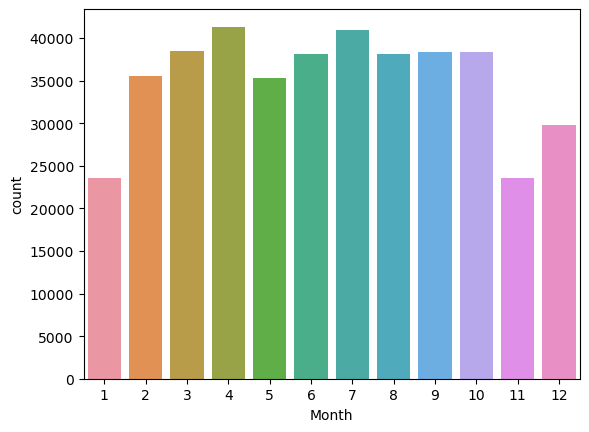

        Year  Ratio
Year               
2011  153453 36.400
2010  140679 33.370
2012  127438 30.229
********************************************


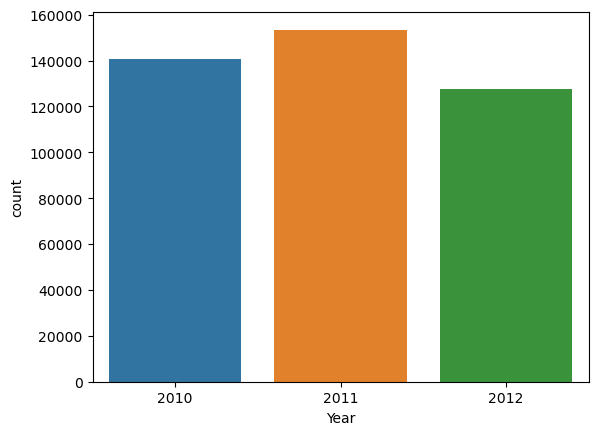

            WeekOfYear  Ratio
WeekOfYear                   
7                 8929  2.118
6                 8895  2.110
9                 8892  2.109
10                8892  2.109
15                8874  2.105
40                8870  2.104
14                8869  2.104
41                8866  2.103
16                8863  2.102
19                8862  2.102
18                8861  2.102
36                8861  2.102
13                8861  2.102
5                 8858  2.101
11                8856  2.101
43                8855  2.100
12                8850  2.099
39                8848  2.099
38                8848  2.099
8                 8844  2.098
37                8842  2.097
35                8837  2.096
42                8836  2.096
17                8826  2.094
24                8826  2.094
25                8810  2.090
33                8809  2.090
34                8809  2.090
31                8804  2.088
20                8800  2.087
27                8795  2.086
23        

             WeekOfMonth  Ratio
WeekOfMonth                    
4                 129632 30.750
2                  97355 23.093
1                  97322 23.086
3                  97261 23.071
********************************************


         Quarter  Ratio
Quarter                
3         117488 27.869
2         114783 27.228
1          97522 23.133
4          91777 21.770
********************************************


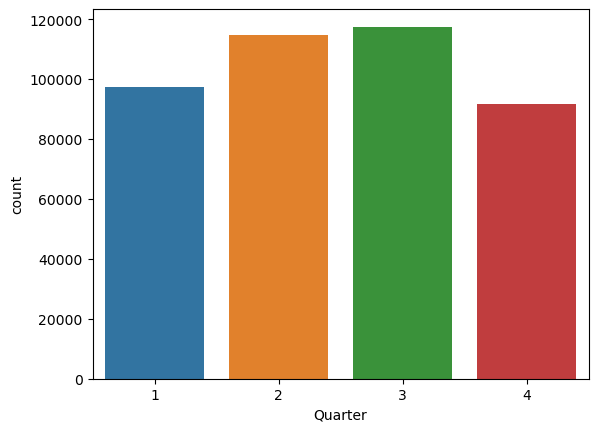

In [27]:
for col in cat_cols:
        cat_summary(df,col, plot=True)

**Kategorik Değişkenler Üzerine Çıkarımlar**
* Store ve Departman değişkenlerinin kategori sayısı fazla ve kategorileri Id niteliğinde. Bu sebeple kardinal değişkenler.
* Bu değişkenleri haftalık satış ortalamalarına göre daha küçük gruplara ayırma kararı alıyorum.

#### NUMERİK DEĞİŞKENLERİ İNCELEME VE GÖRSELLEŞTİRME

count   421570.000
mean     15981.258
std      22711.184
min      -4988.940
5%          59.975
10%        291.097
20%       1340.980
30%       2913.381
40%       4887.960
50%       7612.030
60%      11274.632
70%      16619.325
80%      25217.612
90%      42845.673
95%      61201.951
99%     106479.586
max     693099.360
Name: Weekly_Sales, dtype: float64


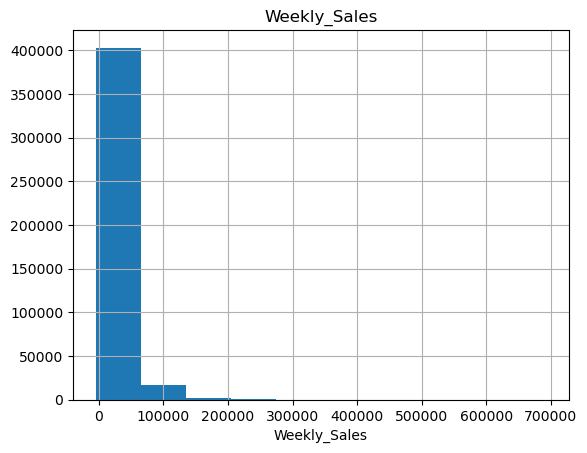

**************************************
count   421570.000
mean        60.090
std         18.448
min         -2.060
5%          27.310
10%         33.980
20%         43.330
30%         50.020
40%         56.110
50%         62.090
60%         67.410
70%         71.670
80%         77.140
90%         83.580
95%         87.270
99%         92.810
max        100.140
Name: Temperature, dtype: float64


**************************************
count   421570.000
mean         3.361
std          0.459
min          2.472
5%           2.653
10%          2.720
20%          2.840
30%          3.016
40%          3.236
50%          3.452
60%          3.571
70%          3.683
80%          3.796
90%          3.917
95%          4.029
99%          4.202
max          4.468
Name: Fuel_Price, dtype: float64


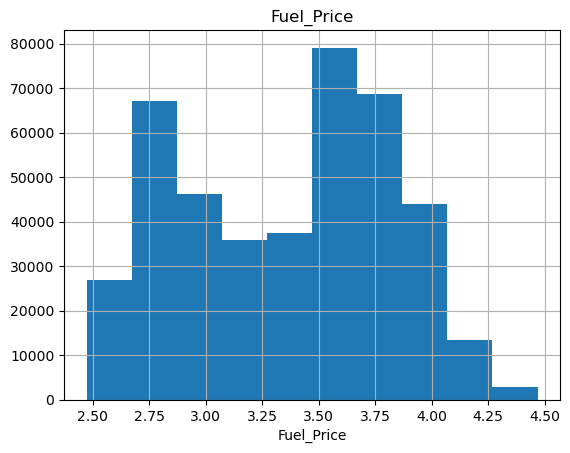

**************************************
count   150681.000
mean      7246.420
std       8291.221
min          0.270
5%         149.190
10%        375.200
20%       1524.370
30%       2799.140
40%       4034.350
50%       5347.450
60%       6623.840
70%       8325.930
80%      10526.010
90%      15282.470
95%      21801.350
99%      41524.030
max      88646.760
Name: MarkDown1, dtype: float64


**************************************
count   111248.000
mean      3334.629
std       9475.357
min       -265.760
5%           1.950
10%          6.980
20%         25.880
30%         61.030
40%        105.350
50%        192.000
60%        364.570
70%       1050.480
80%       3368.340
90%       8549.740
95%      16497.470
99%      50366.600
max     104519.540
Name: MarkDown2, dtype: float64


**************************************
count   137091.000
mean      1439.421
std       9623.078
min        -29.100
5%           0.650
10%          1.650
20%          3.660
30%          6.940
40%         13.060
50%         24.600
60%         43.890
70%         78.070
80%        143.420
90%        400.090
95%       1059.900
99%      63143.290
max     141630.610
Name: MarkDown3, dtype: float64


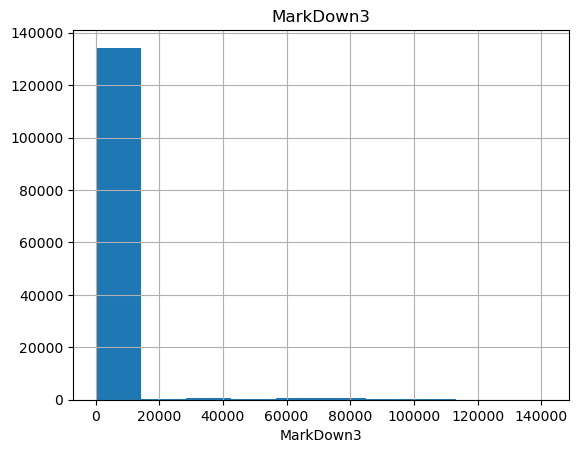

**************************************
count   134967.000
mean      3383.168
std       6292.384
min          0.220
5%          28.760
10%        108.710
20%        393.410
30%        643.780
40%       1001.420
50%       1481.310
60%       2064.370
70%       2993.150
80%       4198.540
90%       7871.420
95%      12645.960
99%      35785.260
max      67474.850
Name: MarkDown4, dtype: float64


**************************************
count   151432.000
mean      4628.975
std       5962.887
min        135.160
5%         715.520
10%       1070.830
20%       1610.180
30%       2147.950
40%       2724.980
50%       3359.450
60%       4009.950
70%       4926.610
80%       6266.040
90%       8337.700
95%      11269.240
99%      27754.230
max     108519.280
Name: MarkDown5, dtype: float64


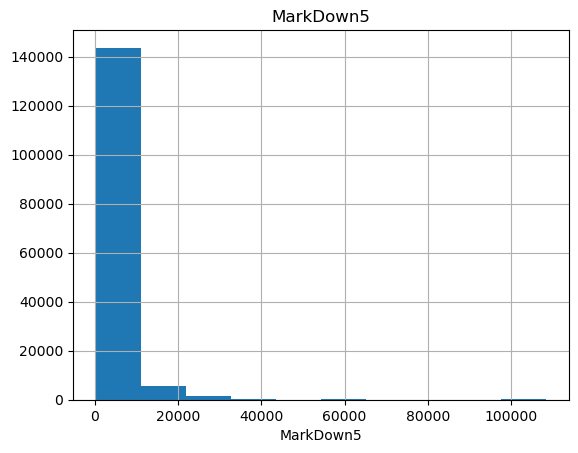

**************************************
count   421570.000
mean       171.202
std         39.159
min        126.064
5%         126.496
10%        128.824
20%        130.885
30%        132.978
40%        137.167
50%        182.319
60%        195.638
70%        210.677
80%        214.666
90%        219.444
95%        221.942
99%        225.474
max        227.233
Name: CPI, dtype: float64


**************************************
count   421570.000
mean         7.960
std          1.863
min          3.879
5%           5.326
10%          5.965
20%          6.589
30%          7.127
40%          7.527
50%          7.866
60%          8.163
70%          8.458
80%          8.818
90%          9.816
95%         12.187
99%         14.180
max         14.313
Name: Unemployment, dtype: float64


**************************************
count   421570.000
mean    136727.916
std      60980.583
min      34875.000
5%       39690.000
10%      39910.000
20%      70713.000
30%     112238.000
40%     120653.000
50%     140167.000
60%     155083.000
70%     200898.000
80%     203742.000
90%     204184.000
95%     206302.000
99%     219622.000
max     219622.000
Name: Size, dtype: float64


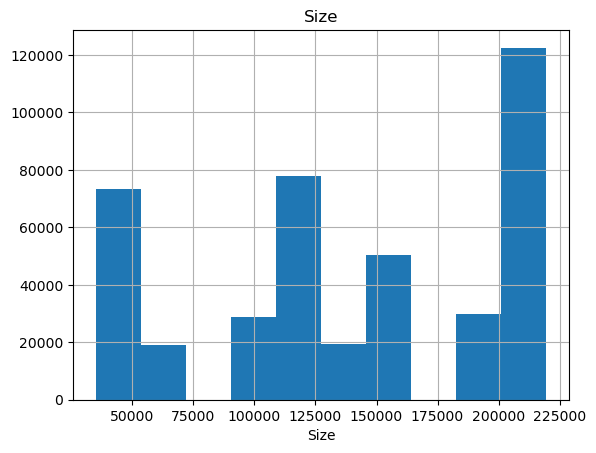

**************************************


In [28]:
for col in num_cols:
    num_summary(df, col, plot=True)

**Numerik Değişkenler Üzerine Çıkarımlar**
* Weekly_Sales ve MarkDown değişkenlerinde aykırı değerler olduğunu dağılımlardan çok net görebiliyorum.

******************************************

### HEDEF DEĞİŞKEN ANALİZLERİ

#### KATEGORİK VERİLERLE HEDEF DEĞİŞKEN ANALİZİ

{'TARGET MEAN':       Weekly_Sales
Type              
A        20099.568
B        12237.076
C         9519.533}


*******************************************


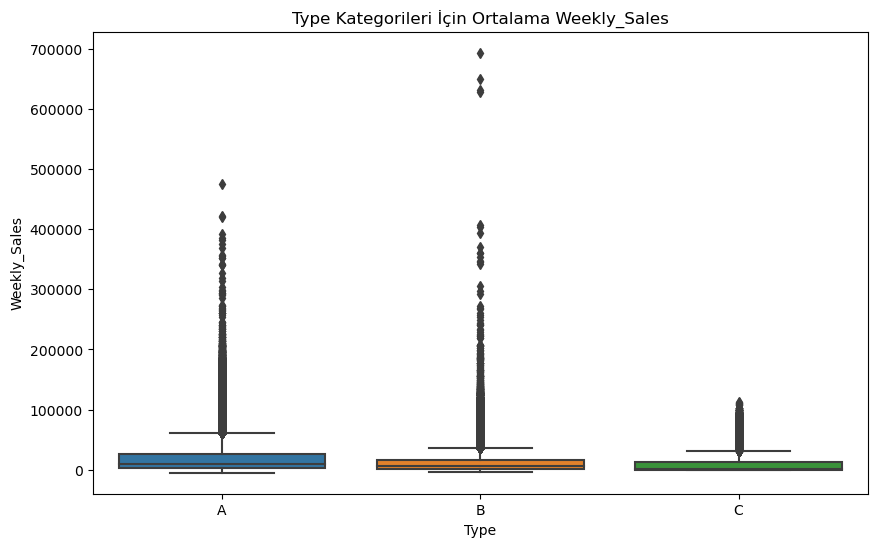

*******************************************


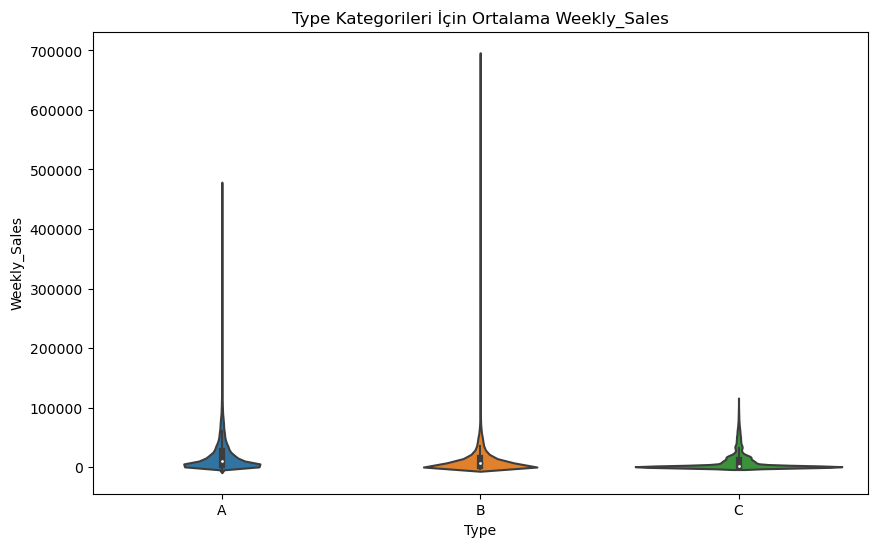

*******************************************


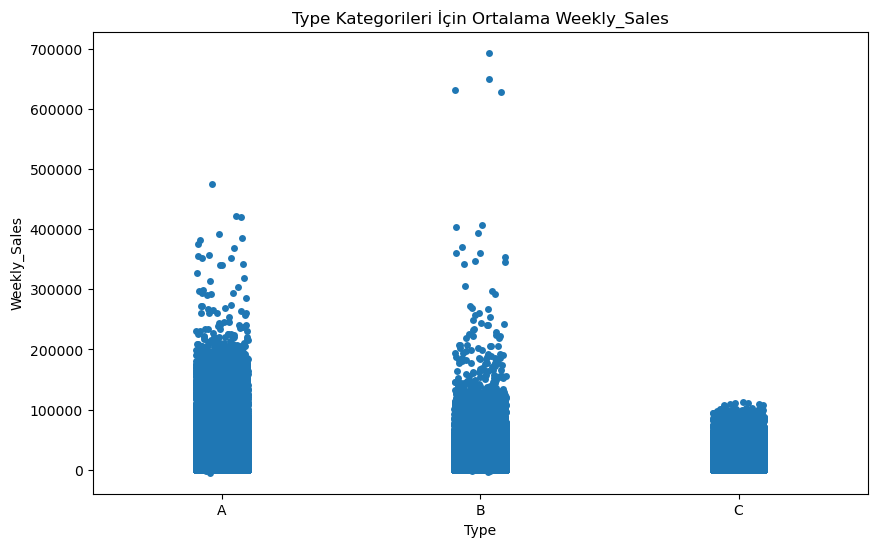

*******************************************
{'TARGET MEAN':        Weekly_Sales
Store              
1         21710.544
2         26898.070
3          6373.034
4         29161.210
5          5053.416
6         21913.244
7          8358.766
8         13133.015
9          8772.890
10        26332.304
11        19276.763
12        14867.309
13        27355.137
14        28784.852
15         9002.493
16         7863.224
17        12954.394
18        15733.313
19        20362.127
20        29508.302
21        11283.435
22        15181.219
23        19776.181
24        18969.106
25        10308.158
26        14554.130
27        24826.985
28        18714.890
29         8158.811
30         8764.238
31        19681.907
32        16351.622
33         5728.414
34        13522.082
35        13803.597
36         8584.413
37        10297.355
38         7492.478
39        21000.764
40        13763.633
41        17976.005
42        11443.370
43        13415.114
44         6038.930
45        11662.897}

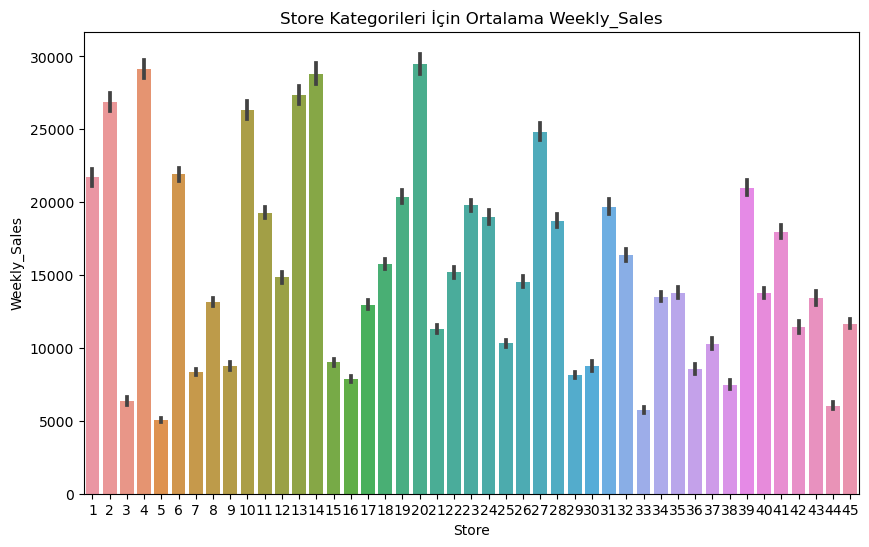

*******************************************


*******************************************


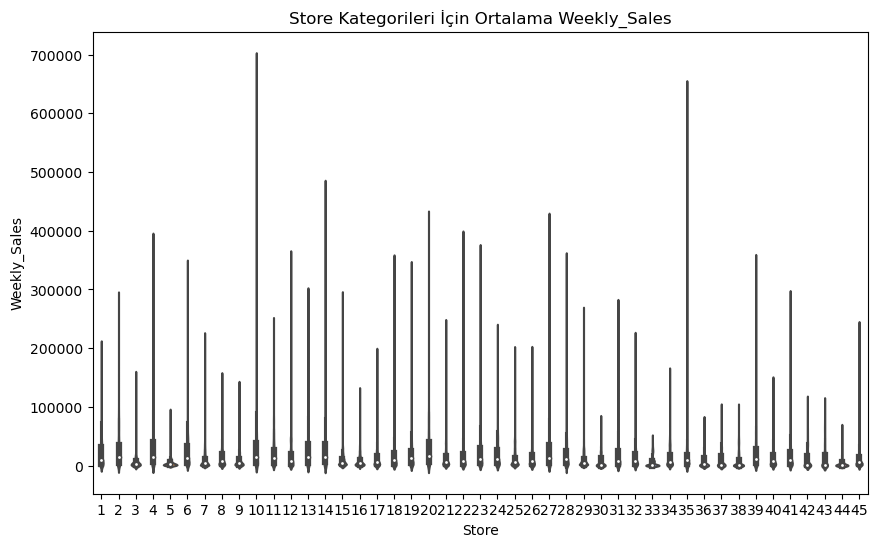

*******************************************


*******************************************
{'TARGET MEAN':       Weekly_Sales
Dept              
1        19213.485
2        43607.020
3        11793.699
4        25974.630
5        21365.584
6         4747.856
7        24161.237
8        30191.264
9        20206.682
10       18321.272
11       14505.638
12        4175.397
13       30663.803
14       14870.966
16       14245.638
17       10187.120
18        7336.944
19        1654.815
20        5528.787
21        4982.851
22       10774.510
23       23931.474
24        6353.605
25        8988.231
26        7649.418
27        1583.438
28         618.085
29        5653.655
30        4118.197
31        2339.440
32        6833.271
33        6471.980
34       15625.915
35        2921.045
36        2022.571
37        3111.076
38       61090.620
39          11.124
40       44900.703
41        1965.560
42        5189.703
43           1.193
44        4651.730
45          23.212
46       19944.741
47          -7.683
48        1344.894
49       

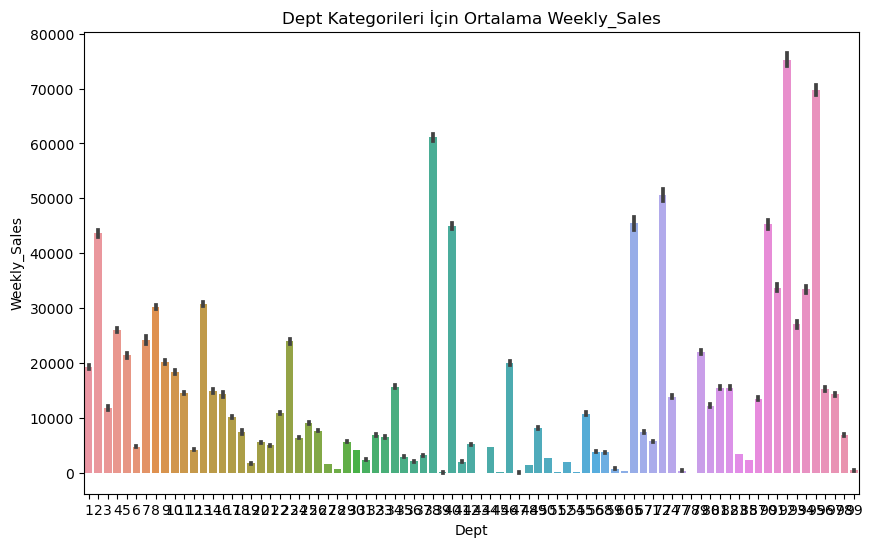

*******************************************


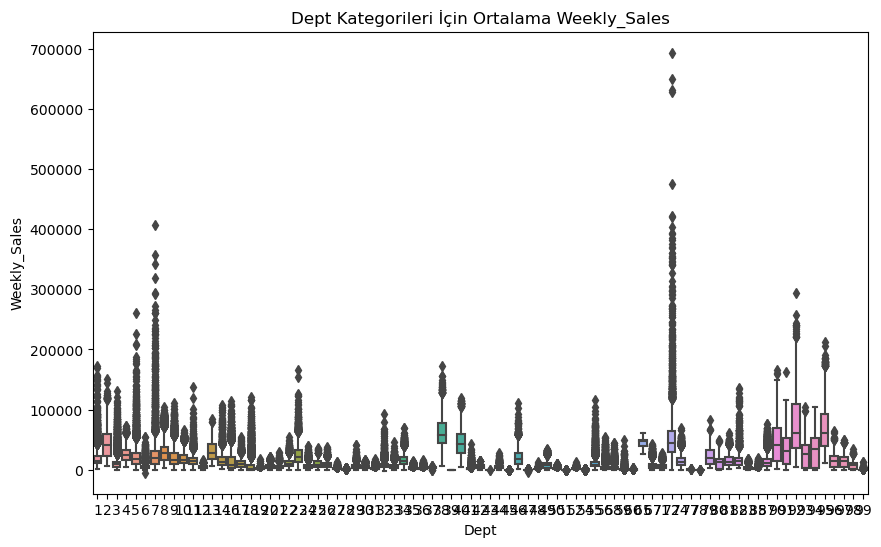

*******************************************


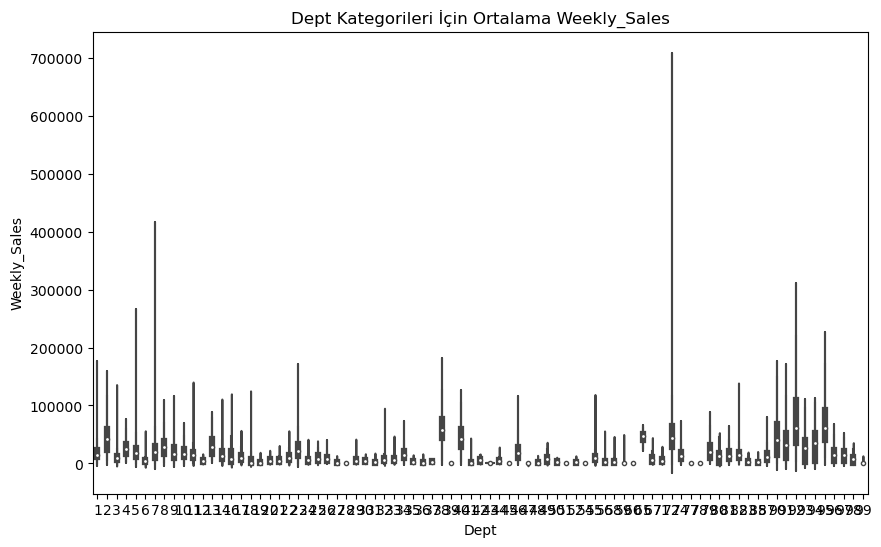

*******************************************


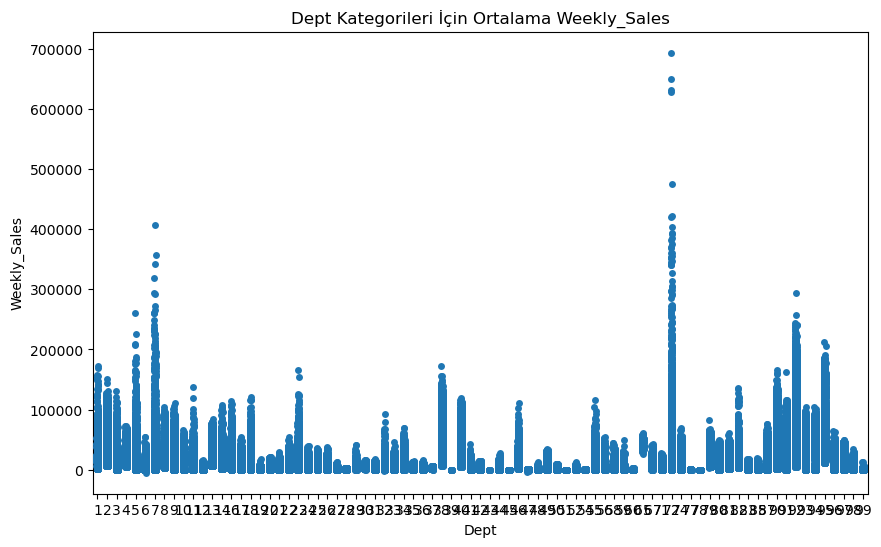

*******************************************
{'TARGET MEAN':            Weekly_Sales
IsHoliday              
0             15901.445
1             17035.823}


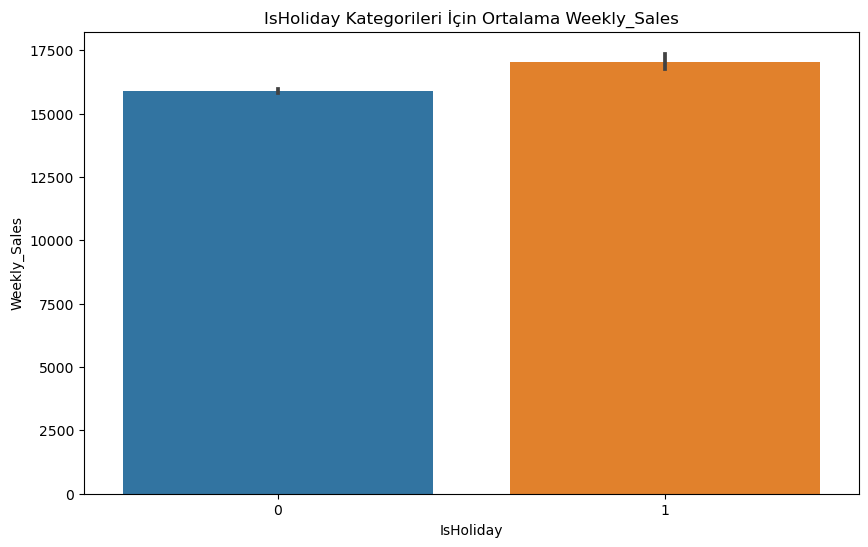

*******************************************


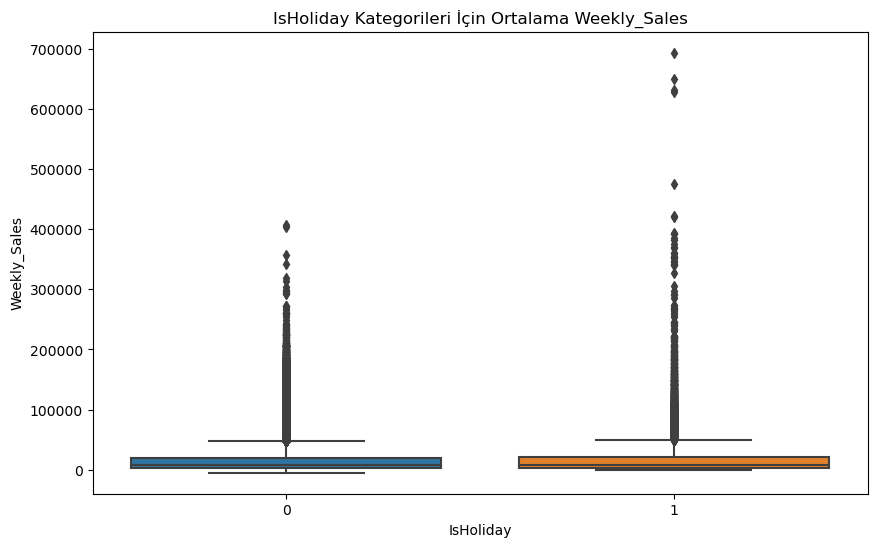

*******************************************


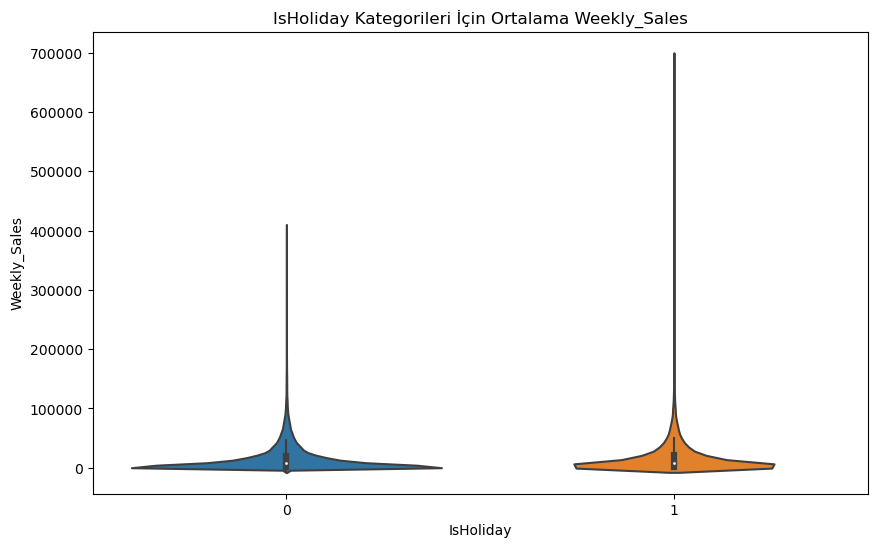

*******************************************


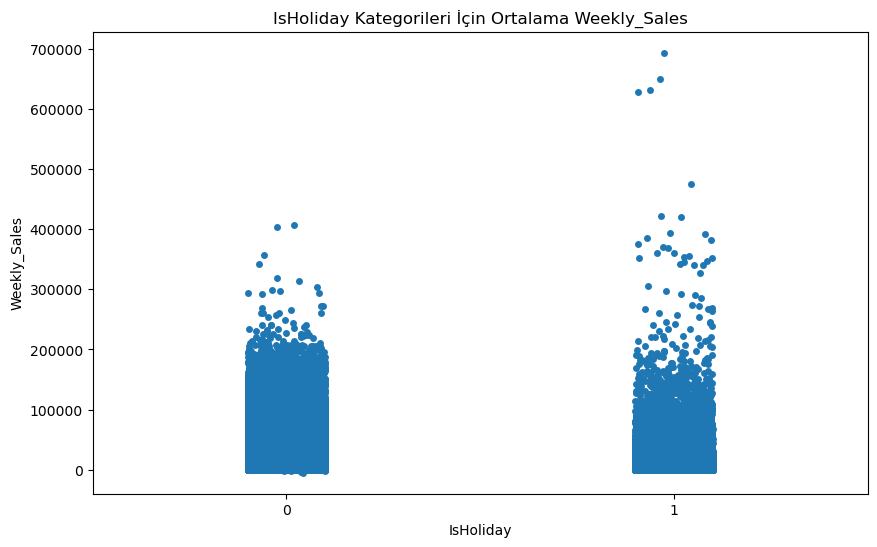

*******************************************
{'TARGET MEAN':      Weekly_Sales
Day              
1       15438.694
2       16282.825
3       16243.592
4       16262.123
5       16152.185
6       16540.153
7       15851.076
8       16026.261
9       16563.237
10      16684.754
11      15946.177
12      15769.984
13      15358.628
14      14843.545
15      15476.566
16      16400.916
17      16890.882
18      15914.848
19      15634.121
20      15236.067
21      14987.075
22      15696.588
23      17183.530
24      17732.369
25      16816.726
26      16742.479
27      14908.183
28      15056.848
29      15117.012
30      15038.411
31      14833.558}


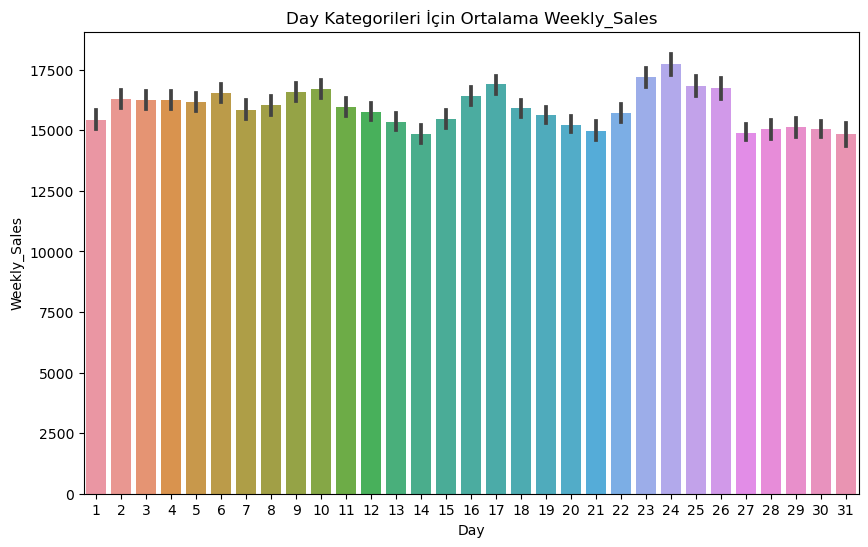

*******************************************


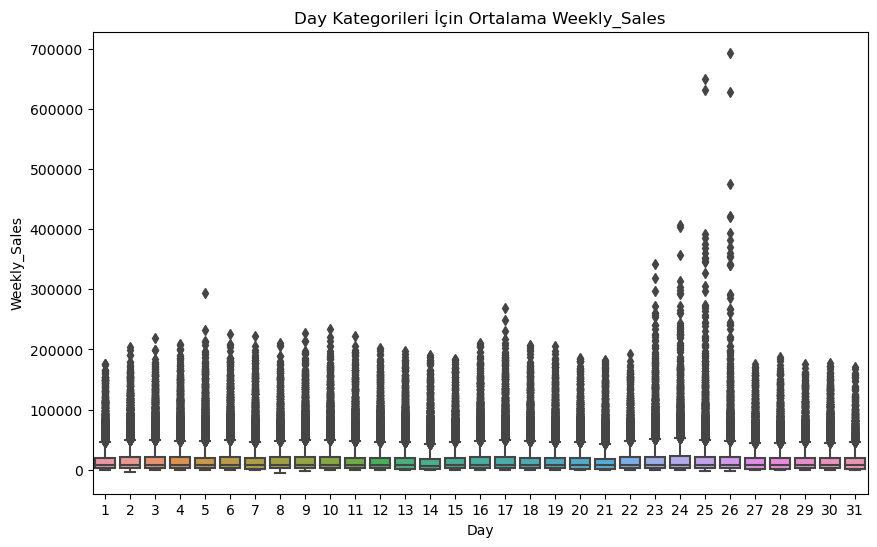

*******************************************


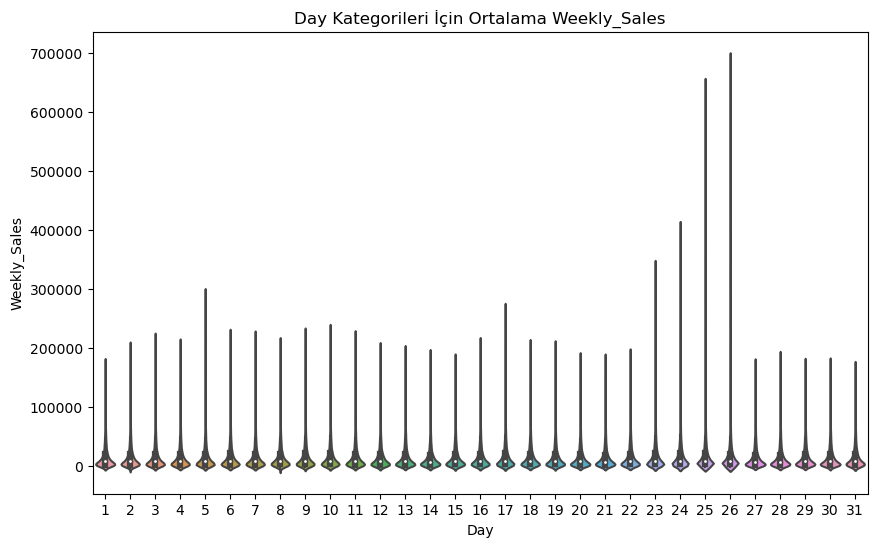

*******************************************


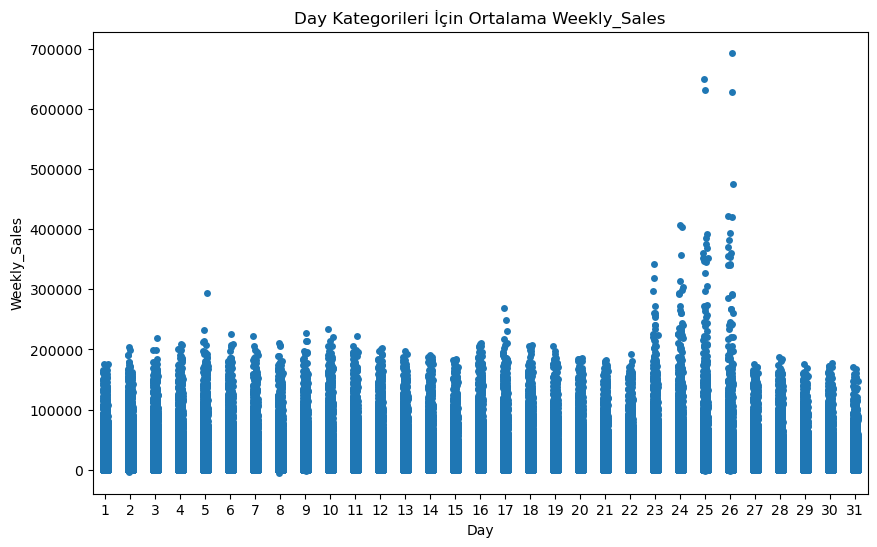

*******************************************
{'TARGET MEAN':        Weekly_Sales
Month              
1         14126.075
2         16008.779
3         15416.658
4         15650.338
5         15776.337
6         16326.137
7         15861.420
8         16062.517
9         15095.886
10        15243.856
11        17491.031
12        19355.702}


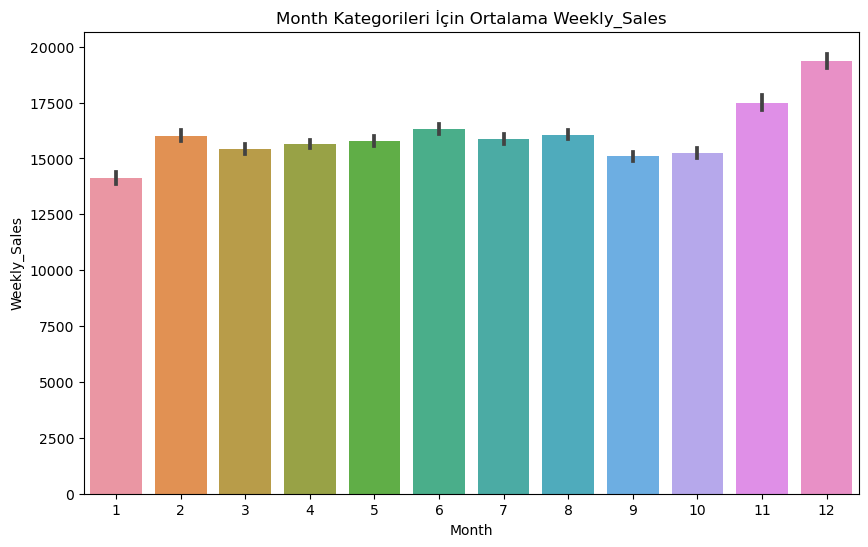

*******************************************


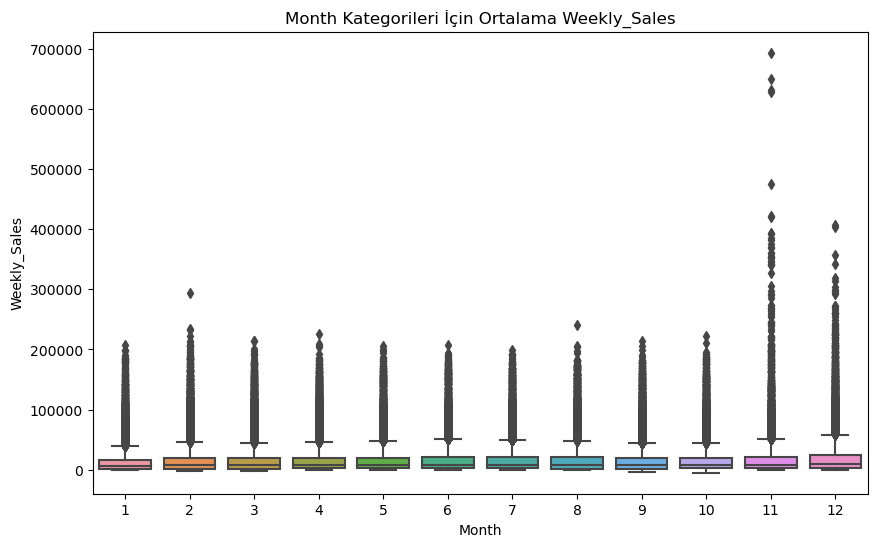

*******************************************


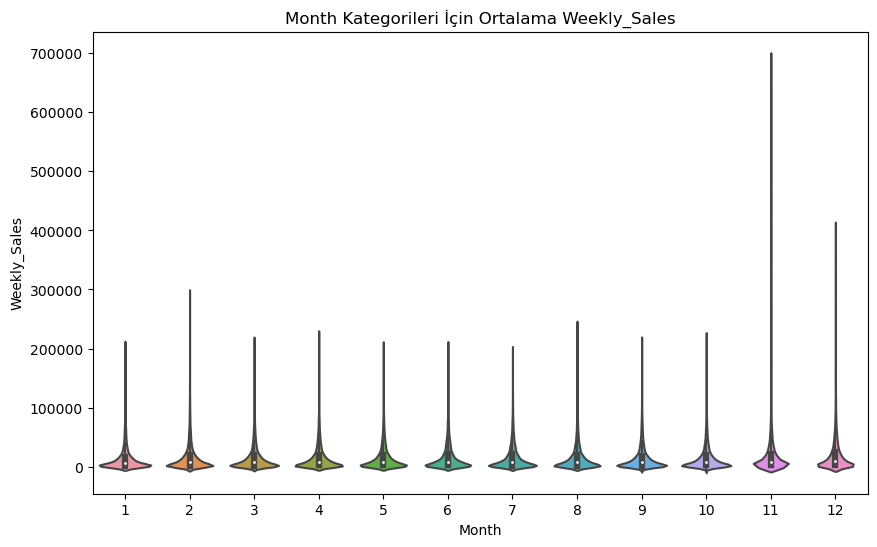

*******************************************


*******************************************
{'TARGET MEAN':       Weekly_Sales
Year              
2010     16270.276
2011     15954.071
2012     15694.949}


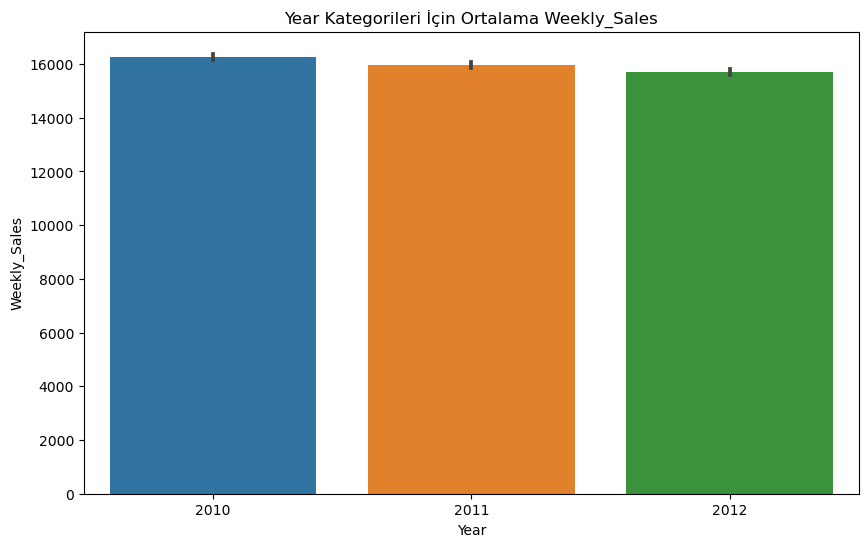

*******************************************


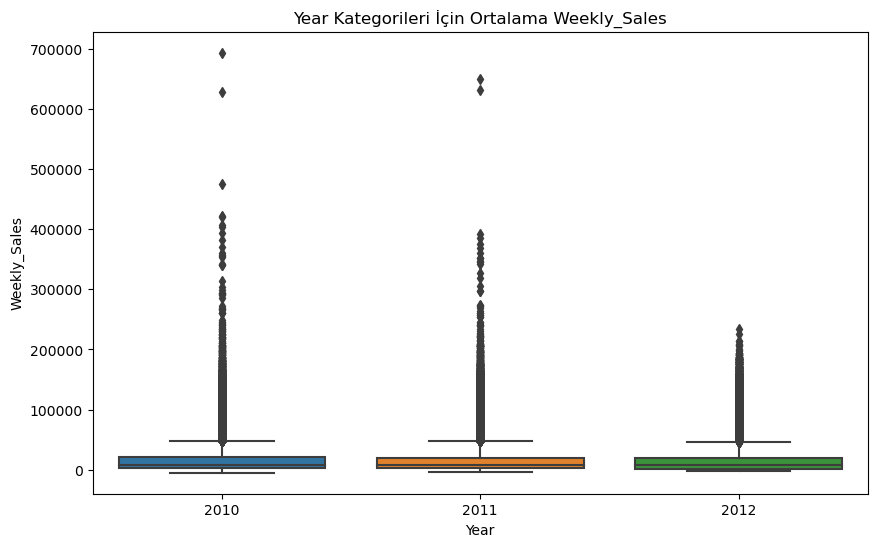

*******************************************


*******************************************


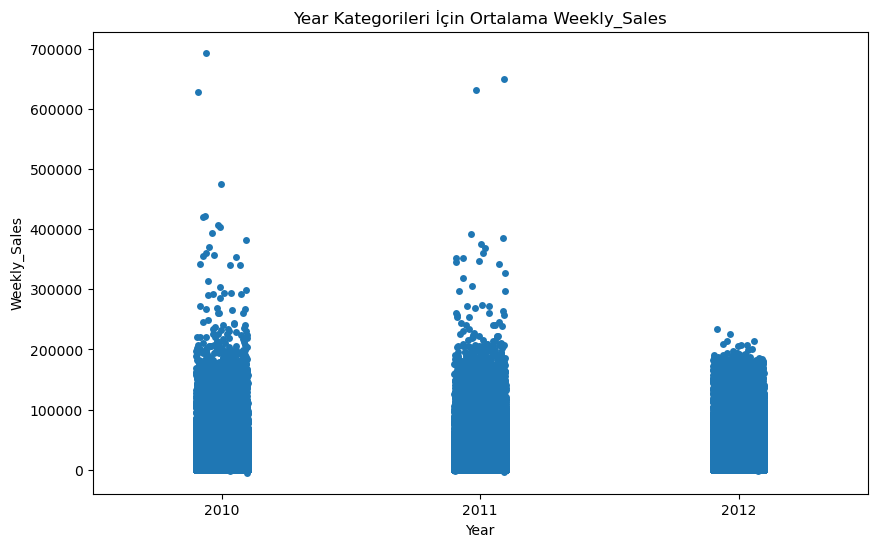

*******************************************
{'TARGET MEAN':             Weekly_Sales
WeekOfYear              
1              14862.140
2              14030.668
3              14077.870
4              13530.034
5              16029.517
6              16377.996
7              16484.513
8              15136.357
9              15824.686
10             15523.298
11             15442.955
12             14915.701
13             15704.287
14             16546.970
15             15414.273
16             15624.921
17             14837.068
18             16080.510
19             15538.491
20             15453.482
21             16032.695
22             16779.736
23             16507.159
24             16256.710
25             15909.355
26             16295.765
27             16715.385
28             15706.911
29             15495.712
30             15099.874
31             16322.849
32             15949.623
33             16044.131
34             15980.703
35             15811.986
36             

*******************************************


*******************************************


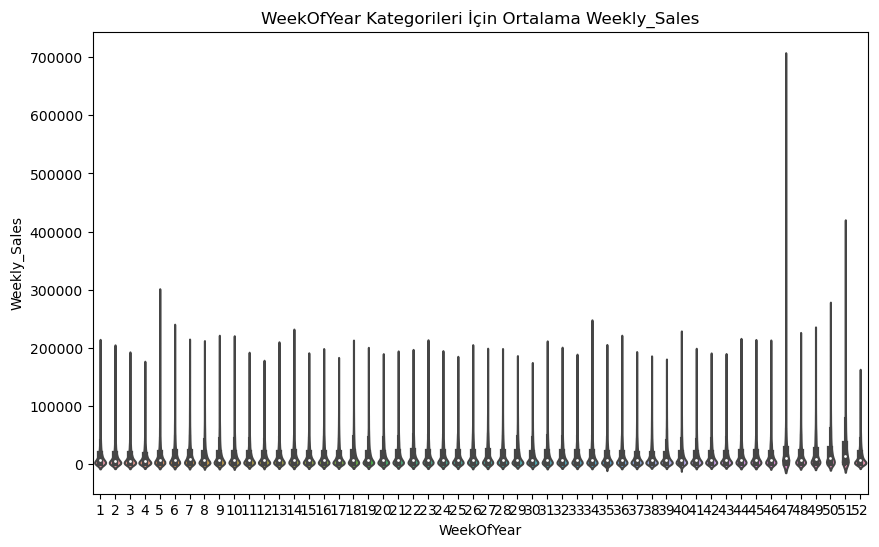

*******************************************


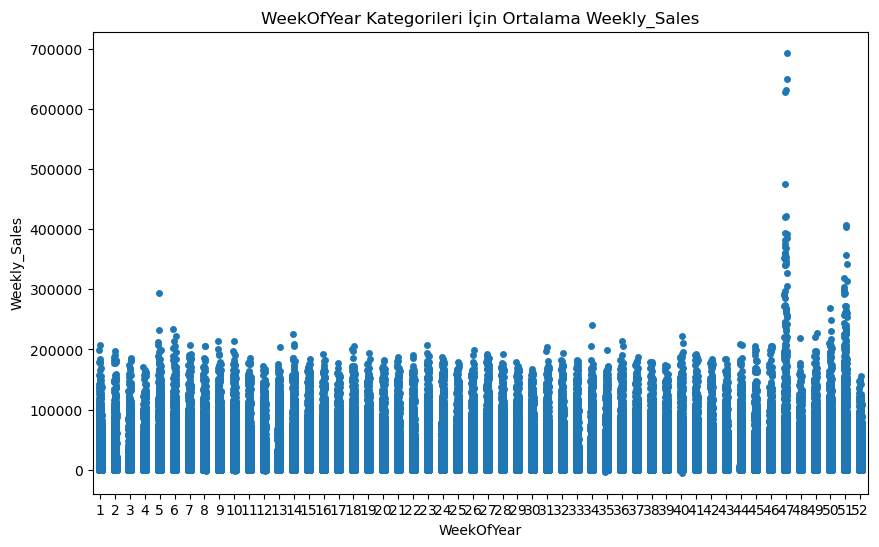

*******************************************
{'TARGET MEAN':              Weekly_Sales
WeekOfMonth              
1               16138.819
2               15912.656
3               15826.835
4               16030.350}


*******************************************


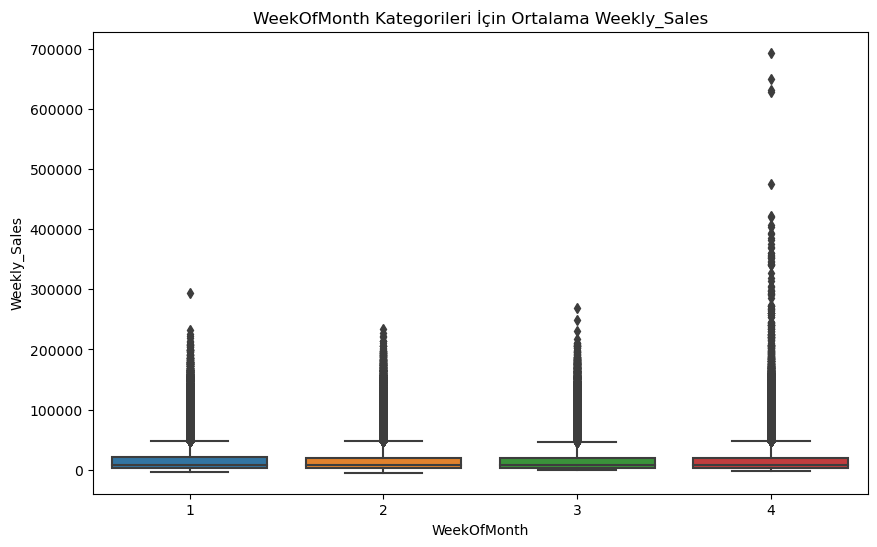

*******************************************


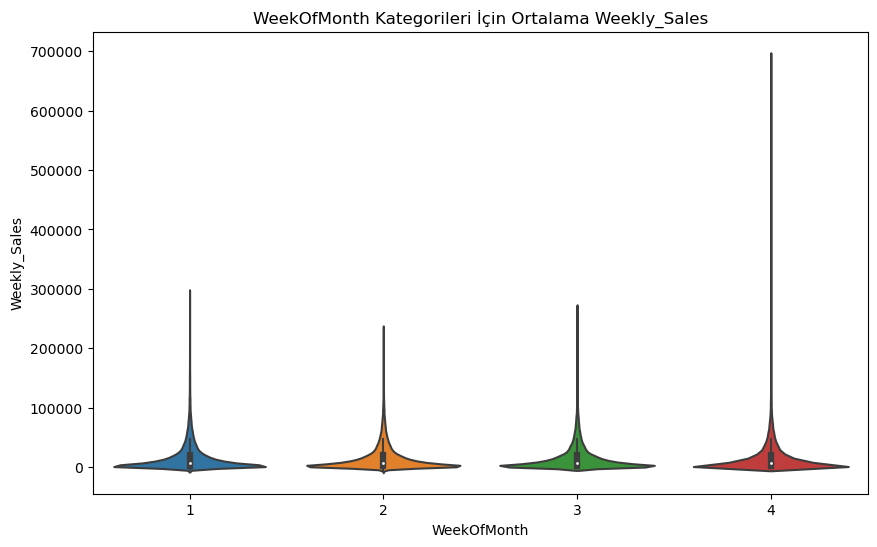

*******************************************


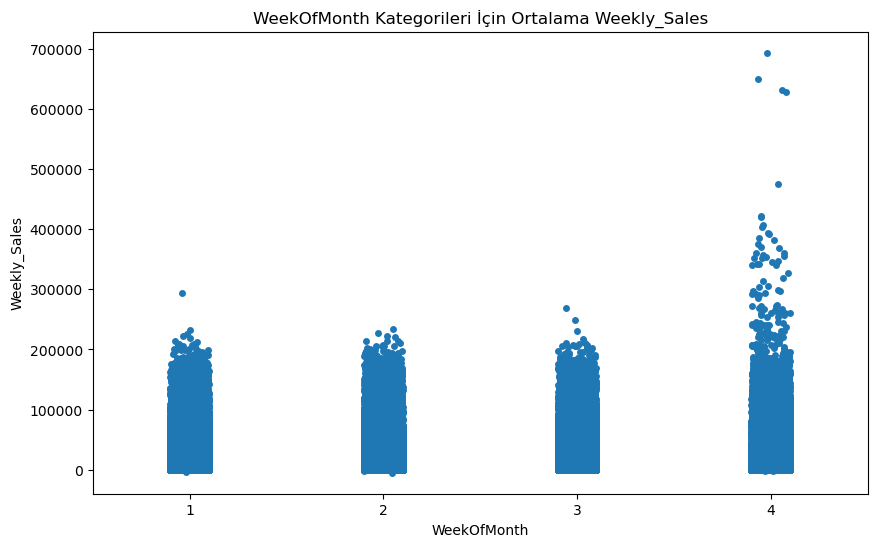

*******************************************
{'TARGET MEAN':          Weekly_Sales
Quarter              
1           15320.771
2           15913.639
3           15676.940
4           17157.231}


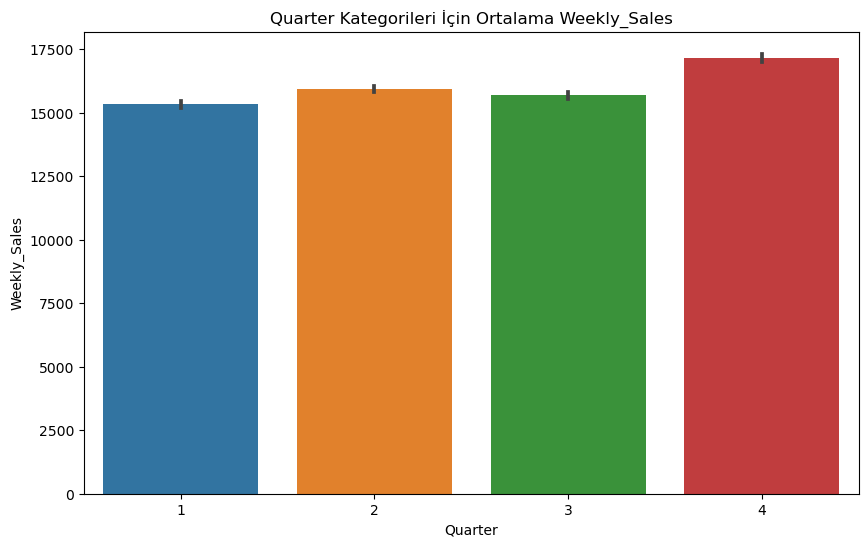

*******************************************


*******************************************


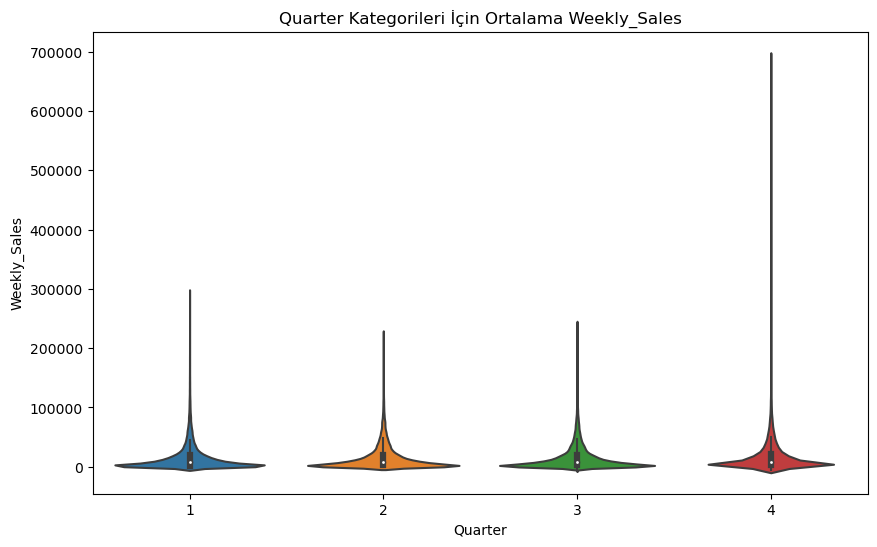

*******************************************


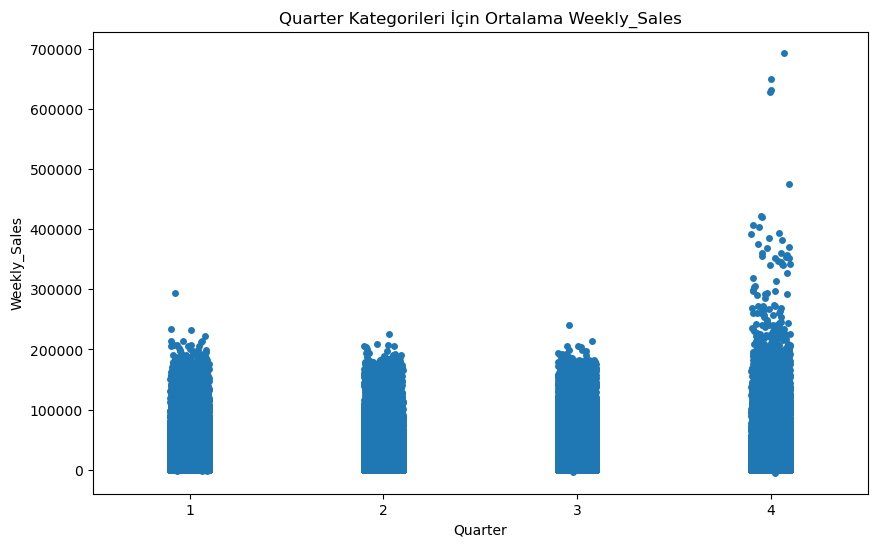

*******************************************


In [29]:
for col in cat_cols:
    target_summary_with_cat(df,"Weekly_Sales", col, plot=True)

Bir de zamana göre ayrıca inceleyelim

In [30]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Date', y='Weekly_Sales').set_title('Tarihe Göre Weekly Sales')
plt.axhline(df['Weekly_Sales'].mean(), color='r', alpha=0.2, linestyle='--')
plt.show()

#### NUMERİK VERİLERLE HEDEF DEĞİŞKEN ANALİZİ

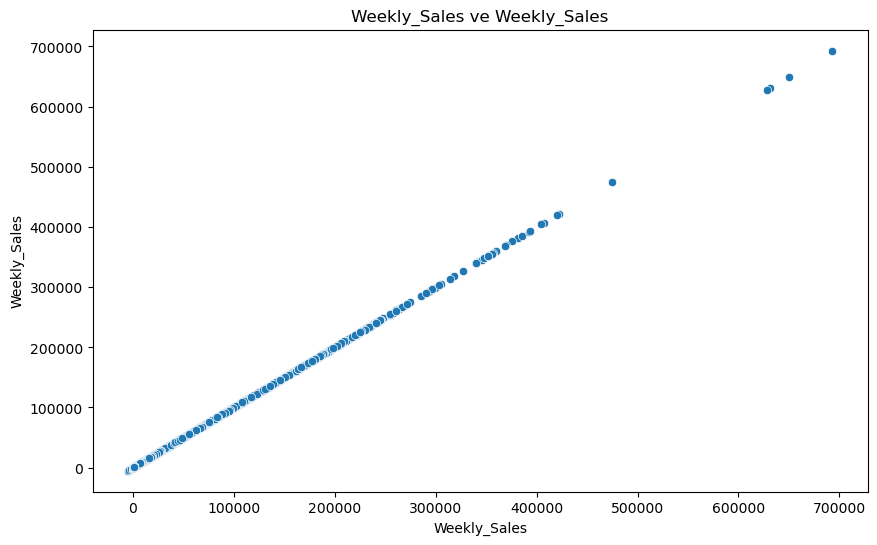

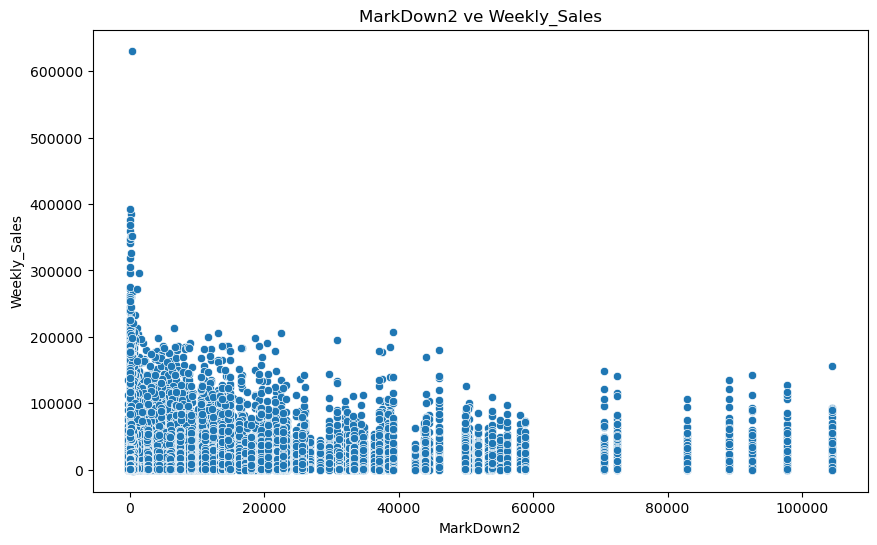

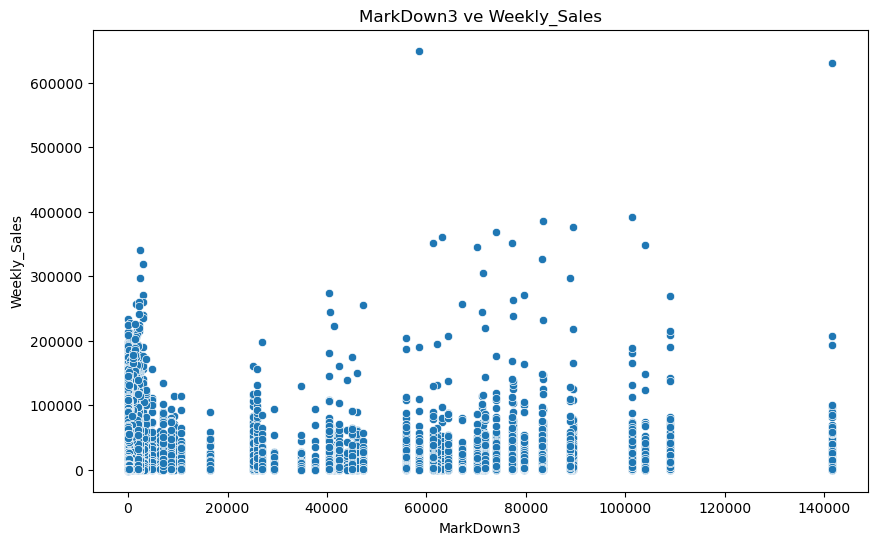

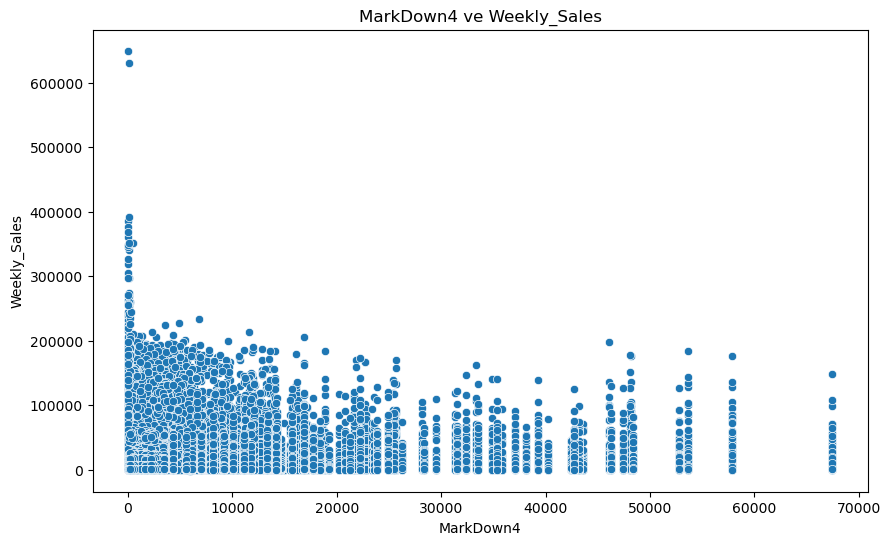

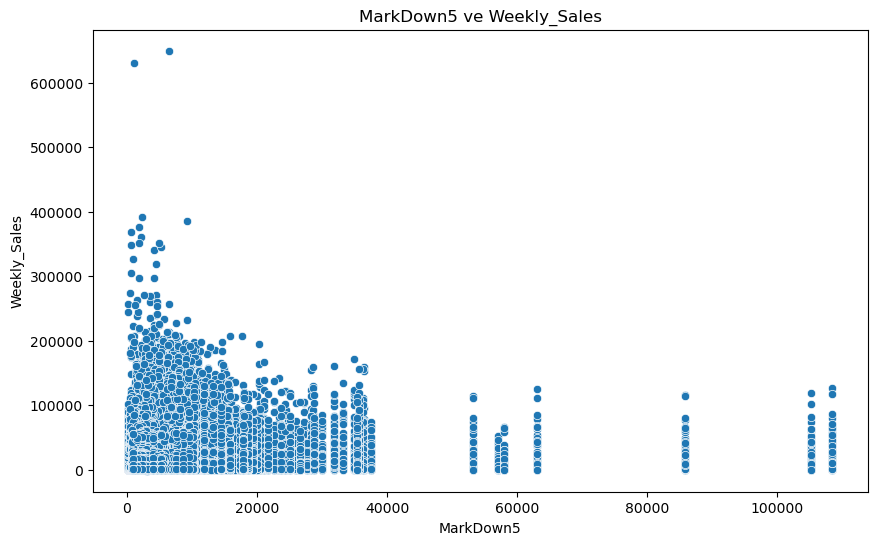

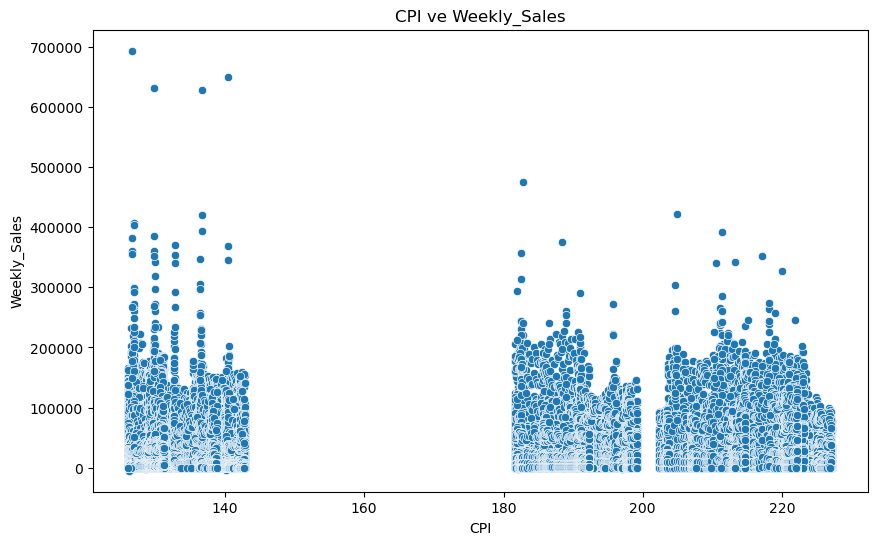

In [31]:
for col in num_cols:
    target_summary_with_num(df,"Weekly_Sales", col, plot=True)

**Gözlemler ve Çıkarımlar**
- Birbirinden türetilen Date değişkenlerinin hedef değişkene etkisi benzer ve ileride korelasyonlu çıkacaklar. Gerekli görülenler silinebilir.
- Hedef değişkene net bir etkisi olmayan kolonlar mevcut. Bunlar üzerinde işlemler yapılabilir, gerek görülenler silinebilir.

**Farklı grafiklerle de inceleyelim.**

###### TEMPERATURE DEĞİŞKENİ

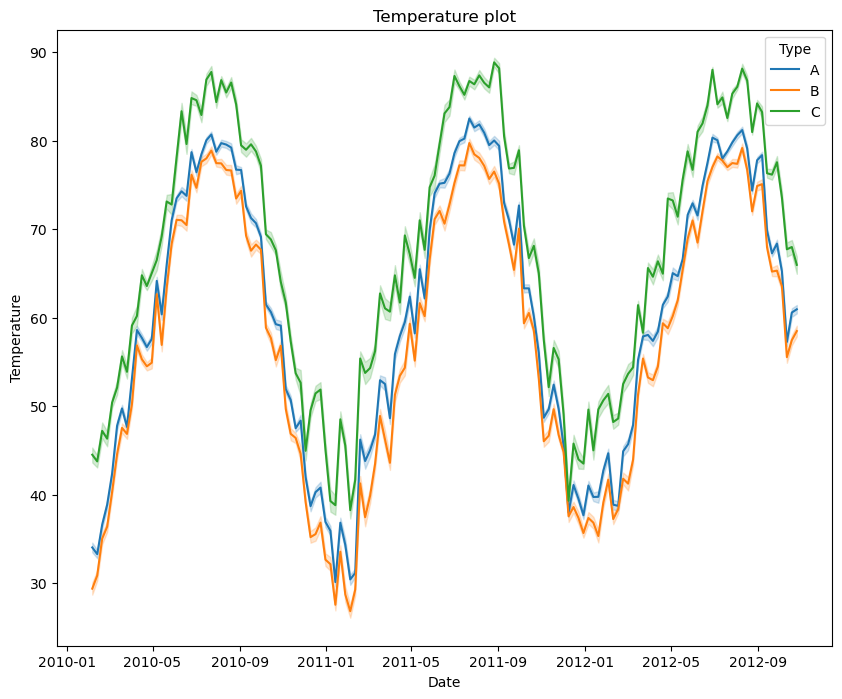

In [32]:
# tarihe göre sıcaklıklar ve type değişkeniyle ilişkisi
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df, x="Date", y='Temperature', hue='Type', ax=ax).set_title('Temperature plot')
plt.show()

In [33]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='Temperature', y='Weekly_Sales').set_title('Temperature Vs Weekly Sales')
plt.show()

###### FUEL PRICE DEĞİŞKENİ

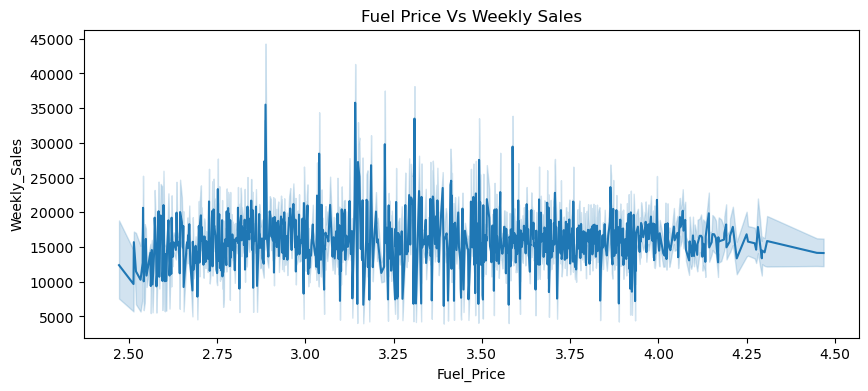

In [34]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='Fuel_Price', y='Weekly_Sales').set_title('Fuel Price Vs Weekly Sales')
plt.show()

###### CPI DEĞİŞKENİ

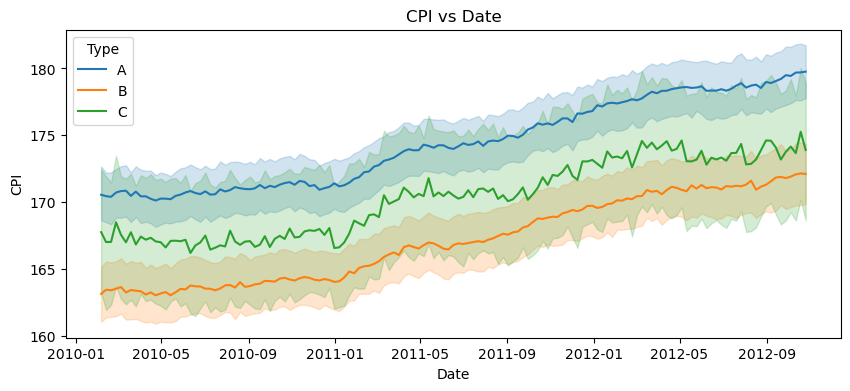

In [35]:
# tarihe göre CPI ve type değişkeniyle ilişkisi
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='Date', y='CPI', hue='Type').set_title('CPI vs Date')
plt.show()

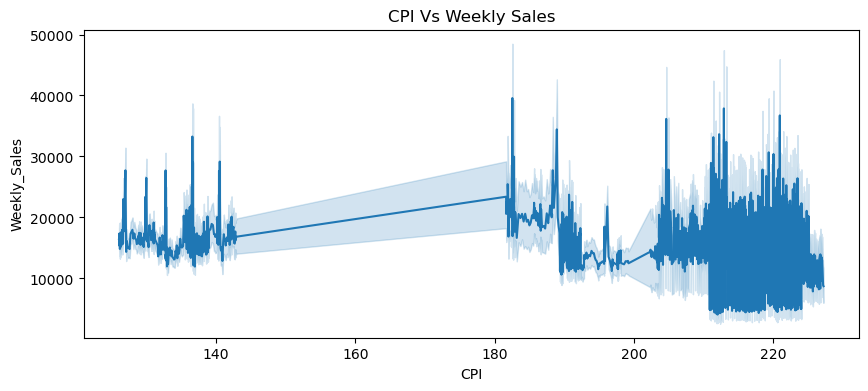

In [36]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='CPI',y='Weekly_Sales').set_title('CPI Vs Weekly Sales')
plt.show()

###### UNEMPLOYEMENT DEĞİŞKENİ

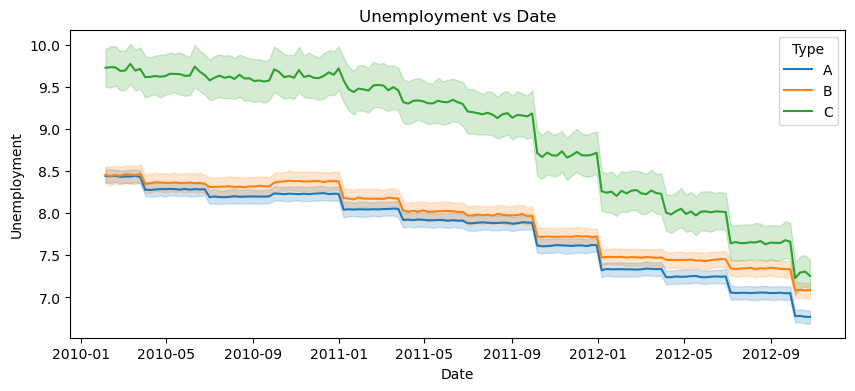

In [37]:
# tarihe göre CPI ve type değişkeniyle ilişkisi
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='Date', y='Unemployment', hue='Type').set_title('Unemployment vs Date')
plt.show()

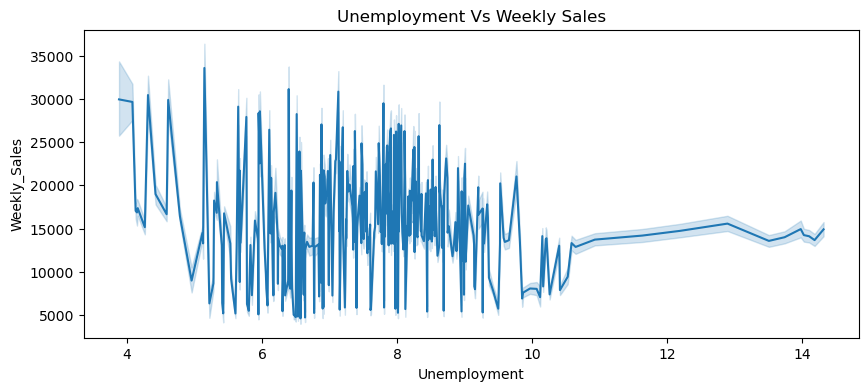

In [38]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='Unemployment',y='Weekly_Sales').set_title('Unemployment Vs Weekly Sales')
plt.show()

###### SIZE DEĞİŞKENİ 

In [39]:
stdf = df.groupby('Type').agg(
    min_size=('Size', 'min'),
    avg_size=('Size', 'mean'),
    max_size=('Size', 'max')
).reset_index()

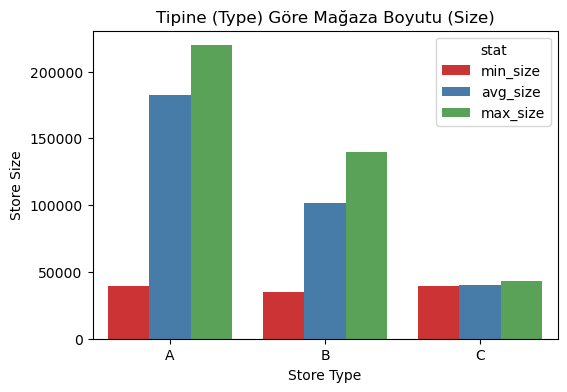

In [40]:
m_df = pd.melt(stdf, id_vars="Type", var_name="stat", value_name="Size")

fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x='Type', y='Size', hue='stat', data=m_df, ax=ax, palette='Set1')
plt.title('Tipine (Type) Göre Mağaza Boyutu (Size)')
plt.xlabel('Store Type')
plt.ylabel('Store Size')
plt.show()


**Gözlem ve Çıkarımlar**
- Type değişkeni Size değişkeninin 3 kategoriye ayrılmış hali diyebiliriz. Bu sebeple muhtemelen yüksek korelasyonlu çıkacaklardır.


*****************************************************************************************

### EKSİK DEĞER ANALİZİ

In [41]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [42]:
miss_cols= missing_values_table(df, True)

           n_miss  ratio
MarkDown2  310322 73.610
MarkDown4  286603 67.980
MarkDown3  284479 67.480
MarkDown1  270889 64.260
MarkDown5  270138 64.080


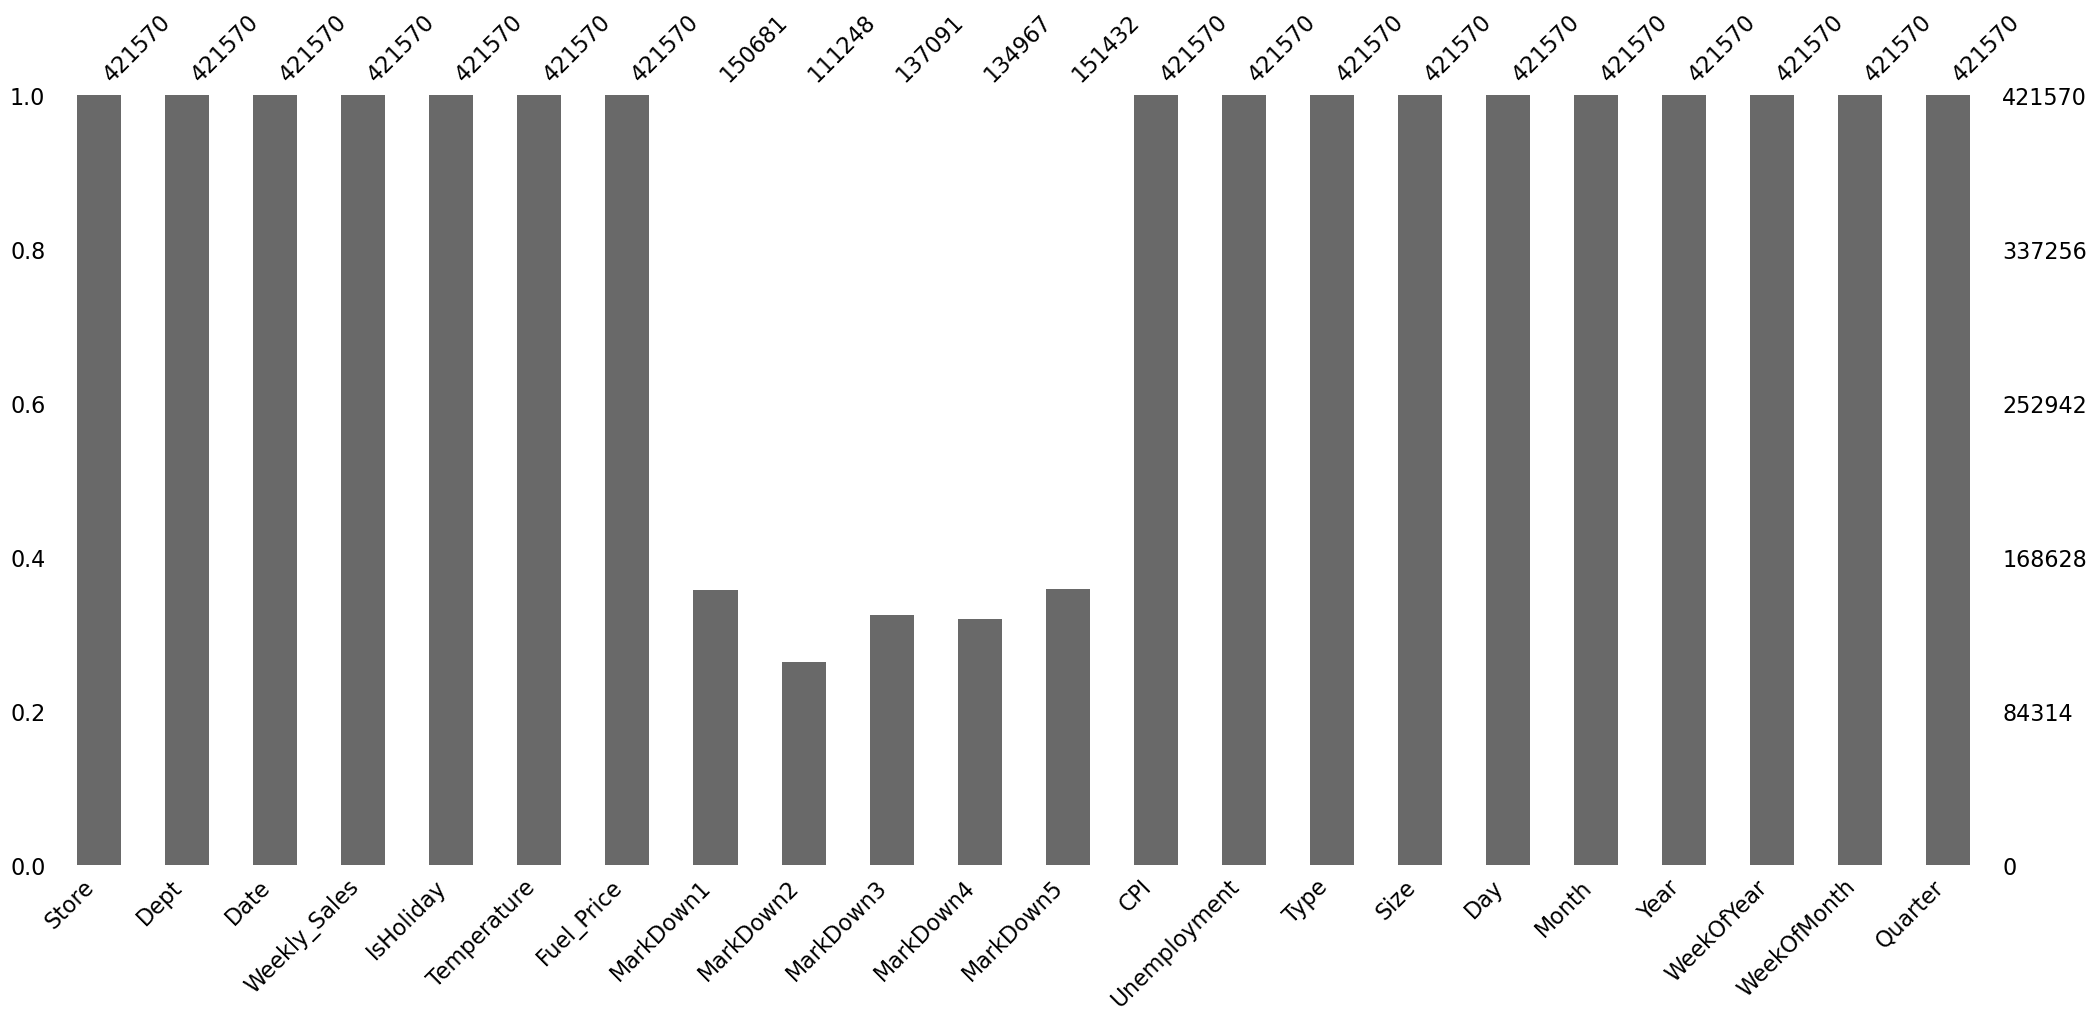

In [43]:
# eksik verileri msno kütüphanesi ile aşağıdaki gibi görselleştirerek yorumlayabiliriz.
msno.bar(df)
plt.show()

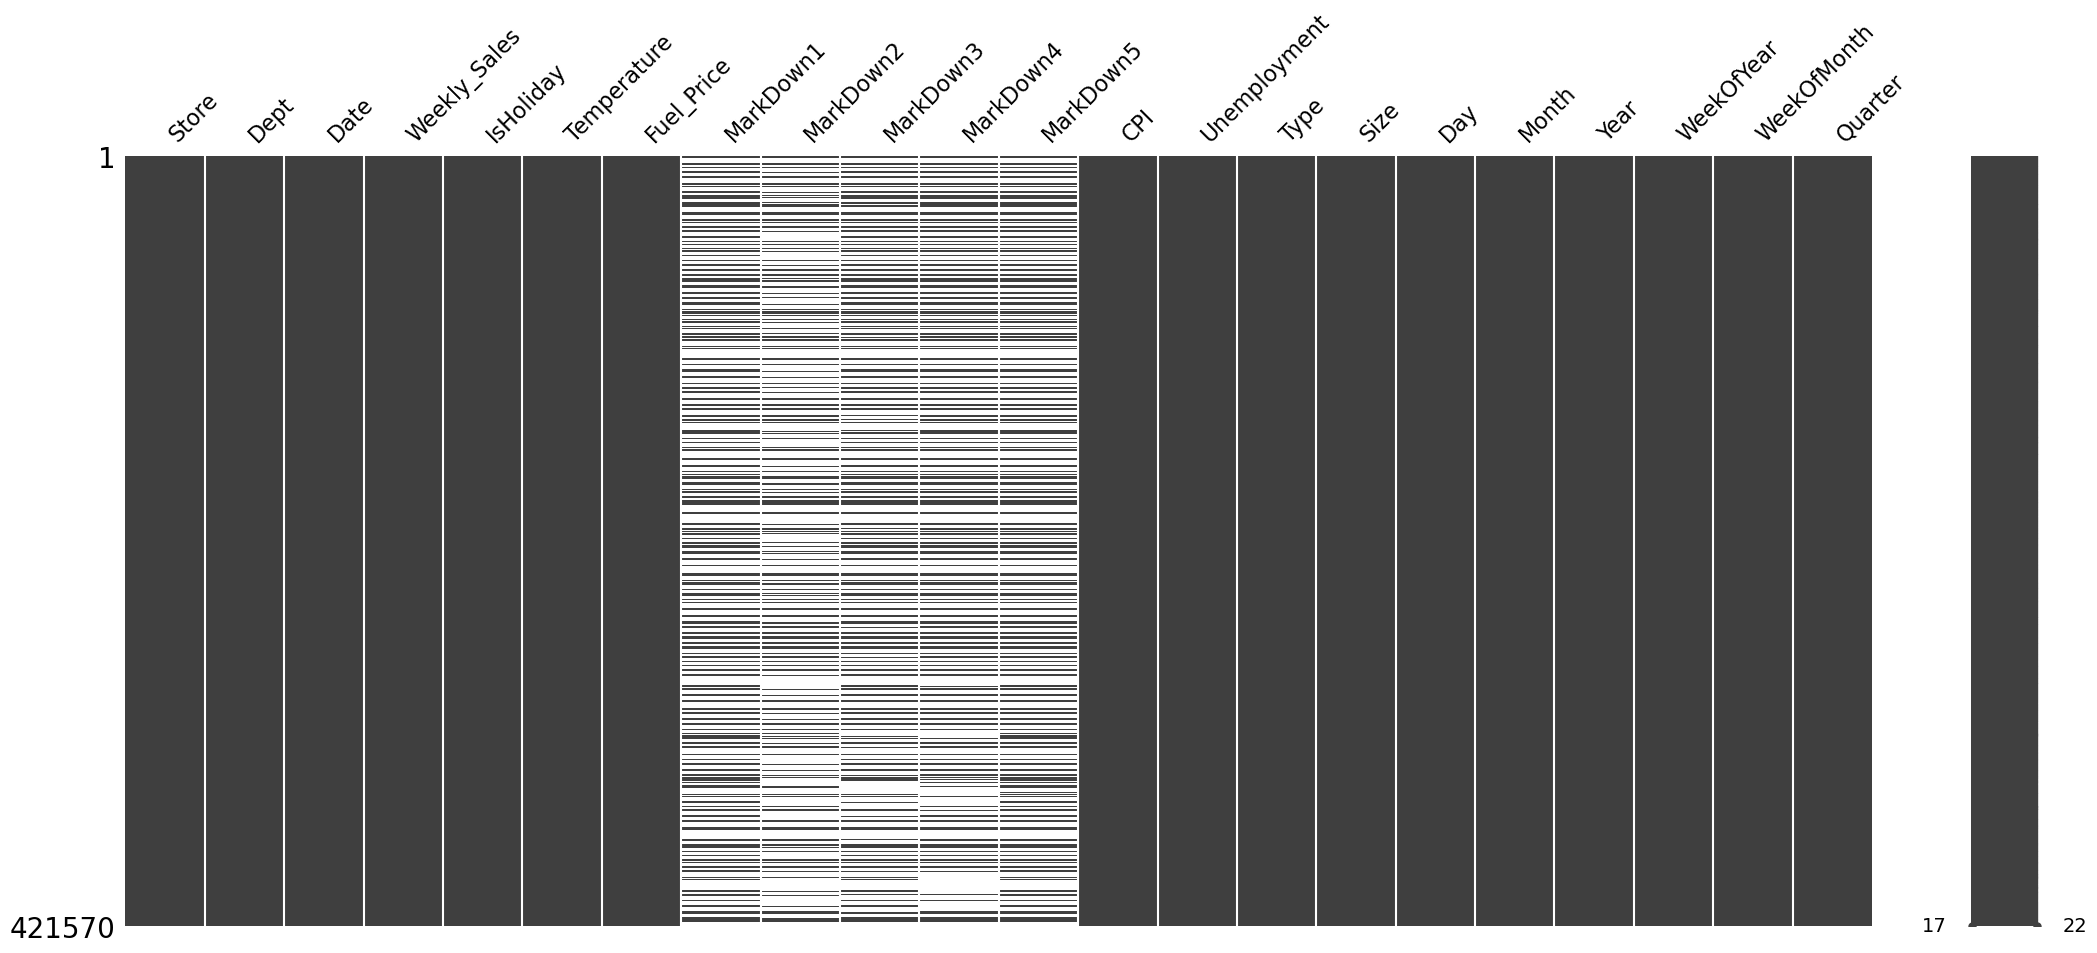

In [44]:
msno.matrix(df)
plt.show()

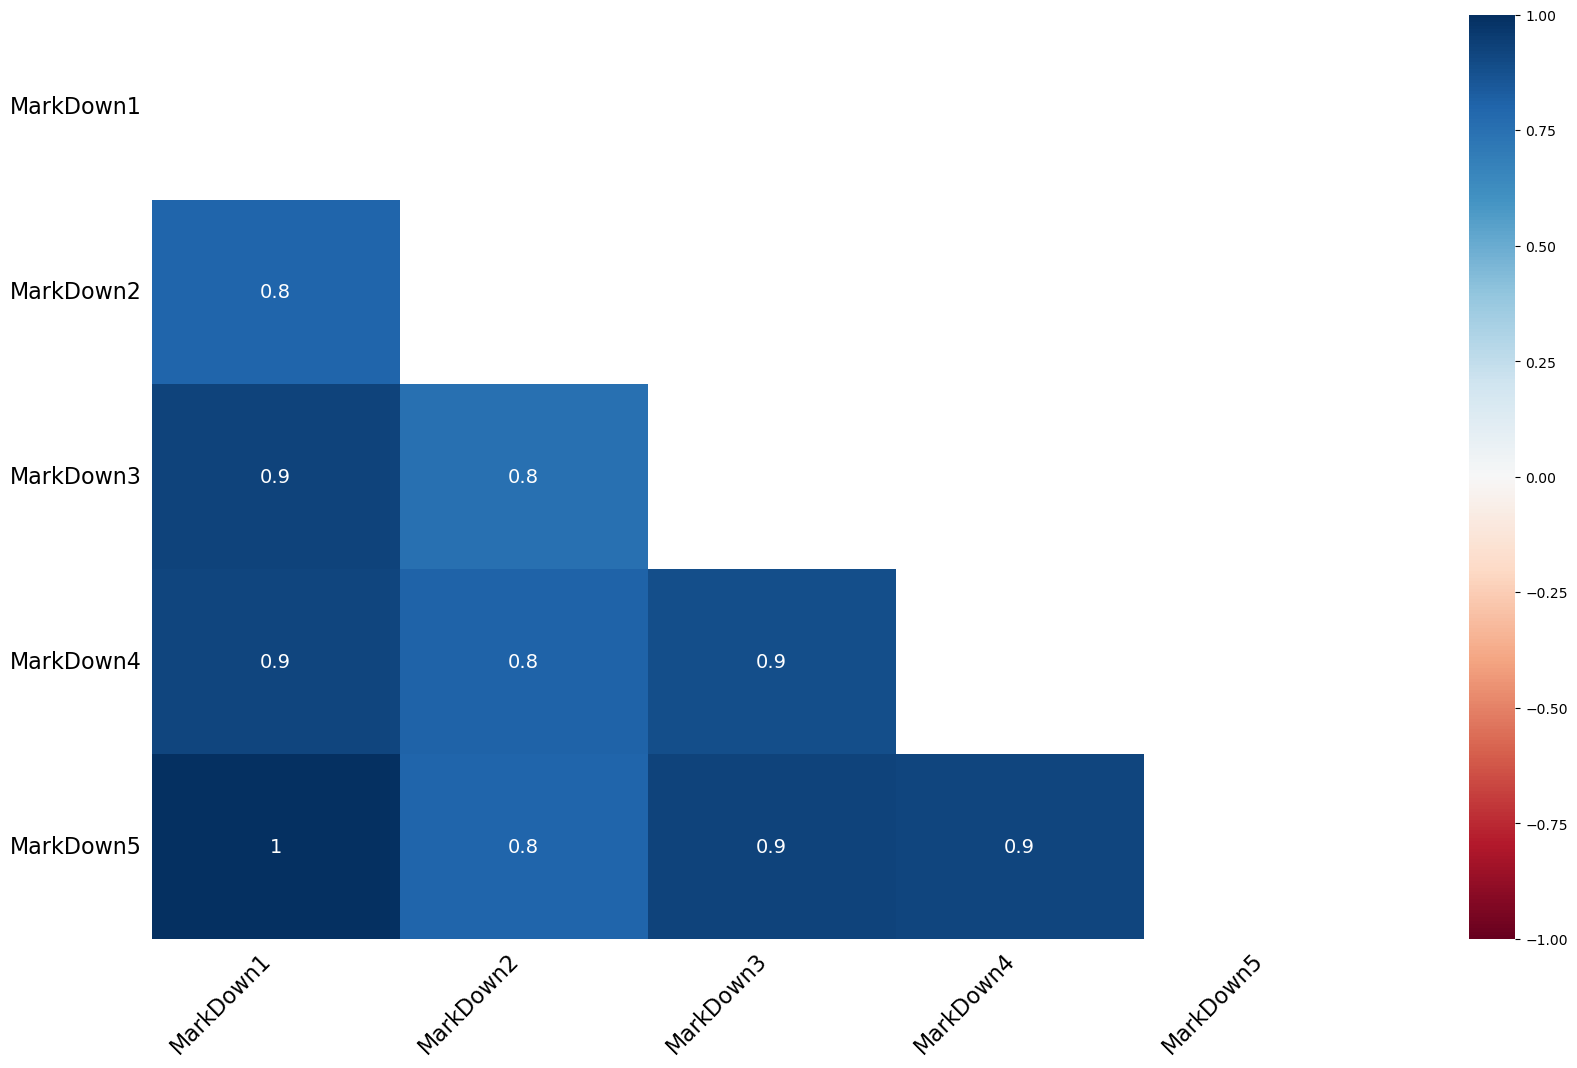

In [45]:
msno.heatmap(df) #değişkenlerin eksikliği arasında artı veya eksi yönde korelasyon var mı
plt.show()

**Gözlem ve Çıkarımlar** 
* Değişkenlerdeki eksik değer oranı çok yüksek. Ayrıca aralarında çok fazla korelasyon var. 
* Bu eksikleri doldurmak veriyi fazla manipüle edebilir. Ayrıca veriyi neye göre dolduracağımıza karar verecek kadar net bilgiler verilmemiş şirket tarafından. (Örneğin MarkDown'ların birimi bilinmiyor.)
* MarkDown Değişkenlerinden HasMarkDown ve TotalMarkDown olmak üzere 2 yeni değişken oluşturmayı, gerekirse MarkDownları silmeyi düşünüyorum.

***********************

### AYKIRI DEĞER ANALİZİ

Numerik kolonlarımda aykırı değerler olup olmadığını inceliyorum.

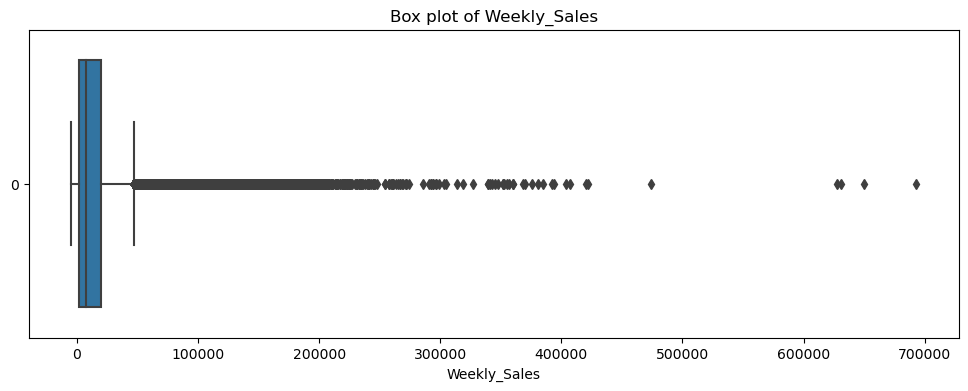

Weekly_Sales True


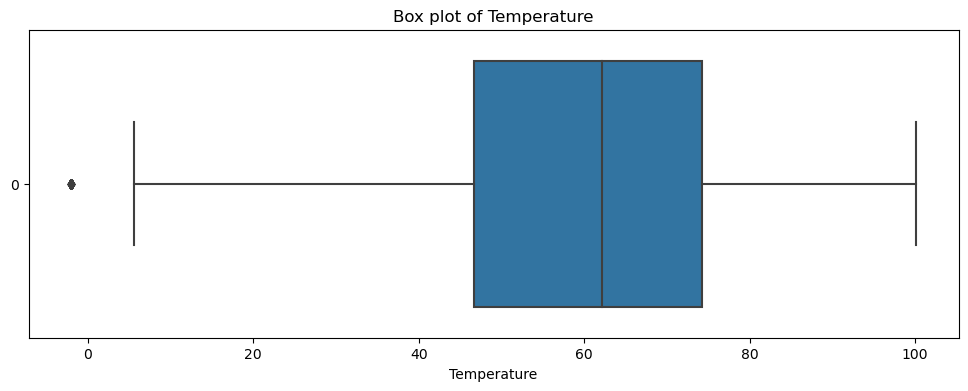

Temperature False


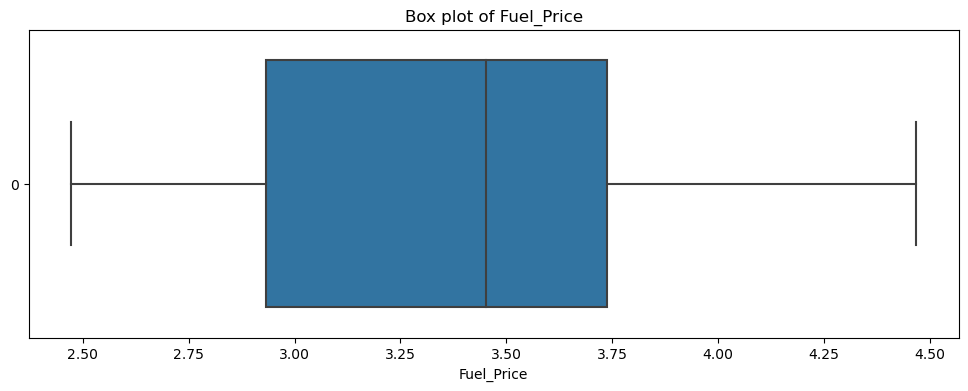

Fuel_Price False


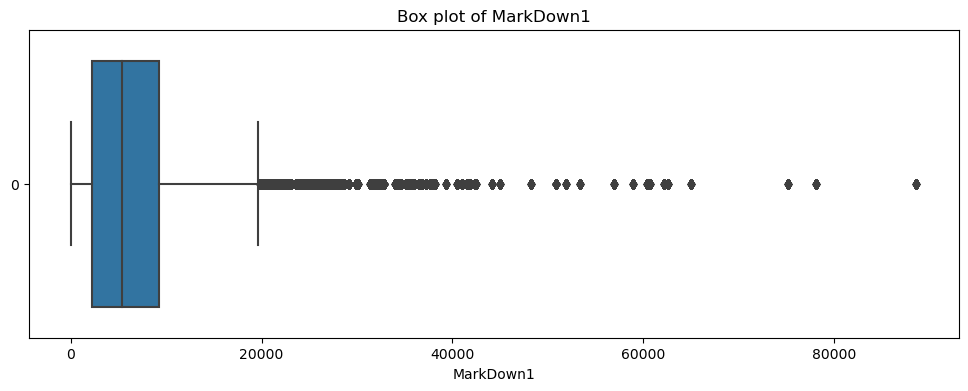

MarkDown1 True


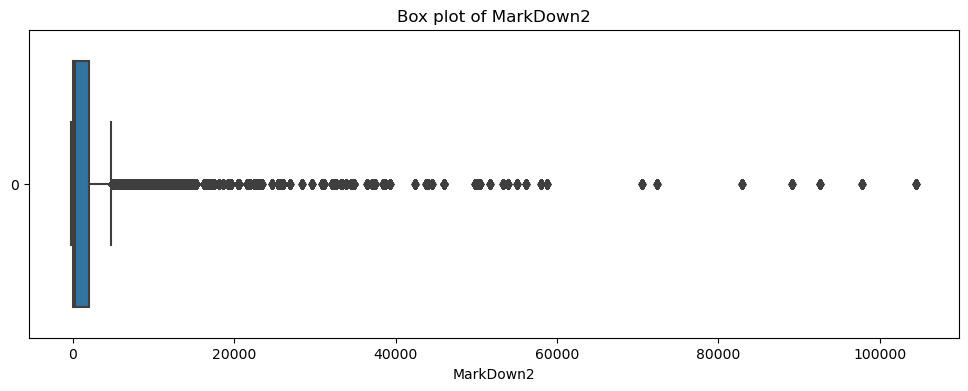

MarkDown2 True


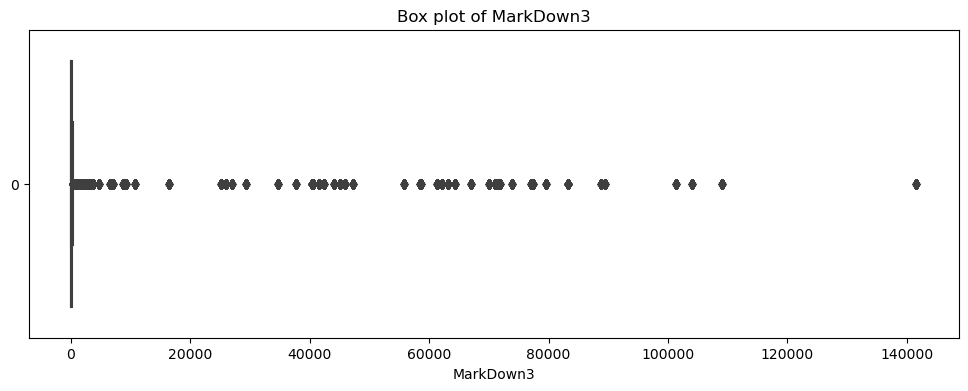

MarkDown3 True


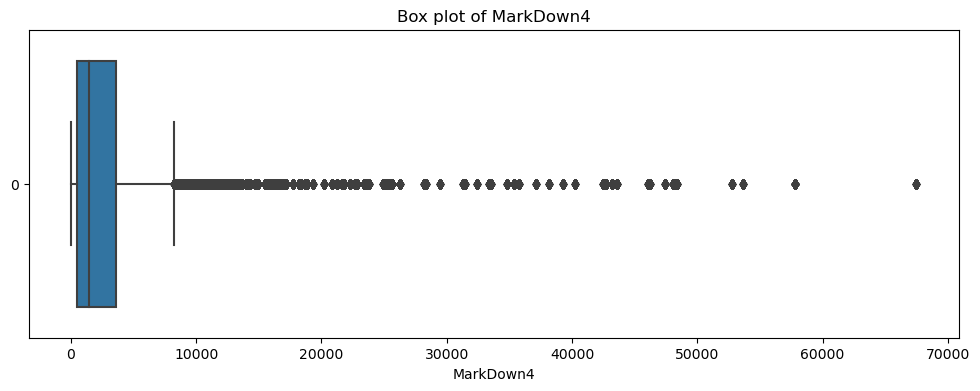

MarkDown4 True


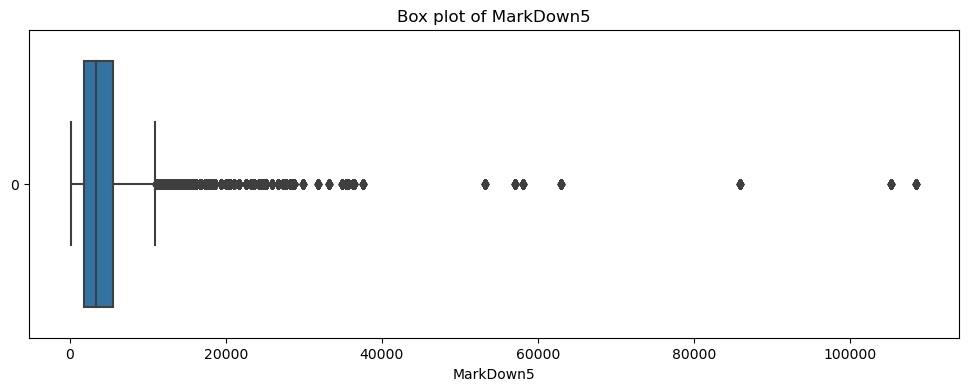

MarkDown5 True


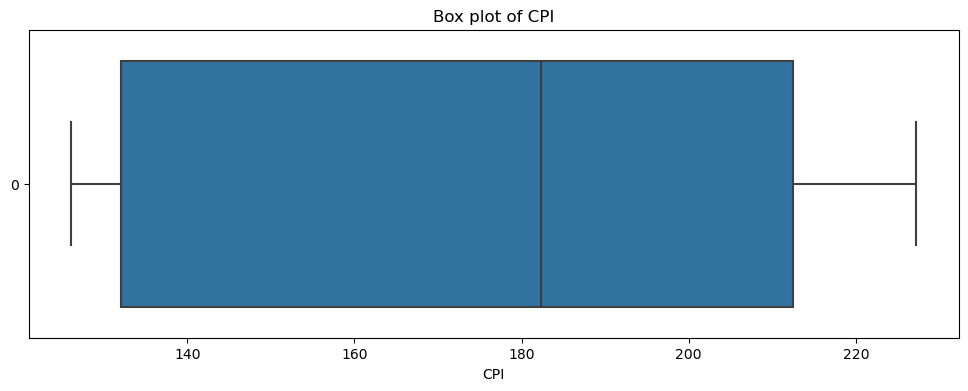

CPI False


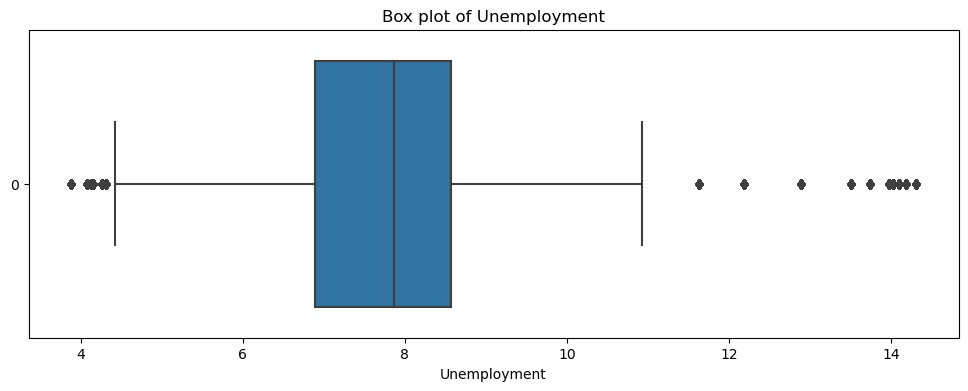

Unemployment False


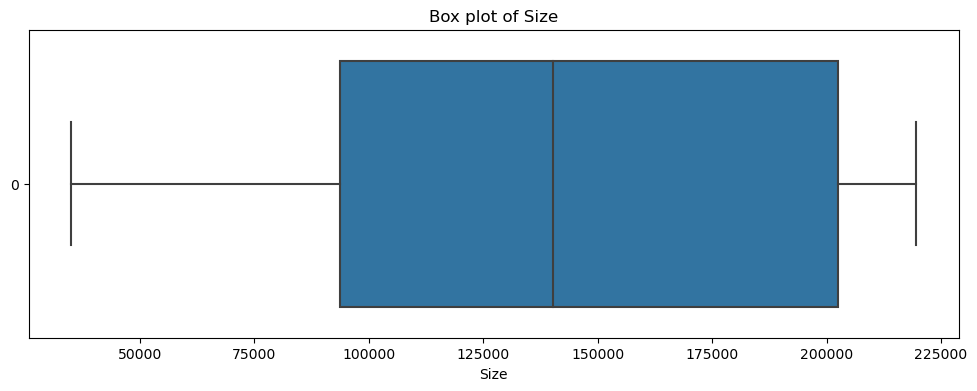

Size False


In [48]:
for col in num_cols:
    print(col, check_outlier(df, col))

Weekly_Sales ve MarkDown değişkenlerinde aykırı değğerler var. Markdown değişkenlerine bu aşamada müdahele etmiyorum. İleride edeceğim.

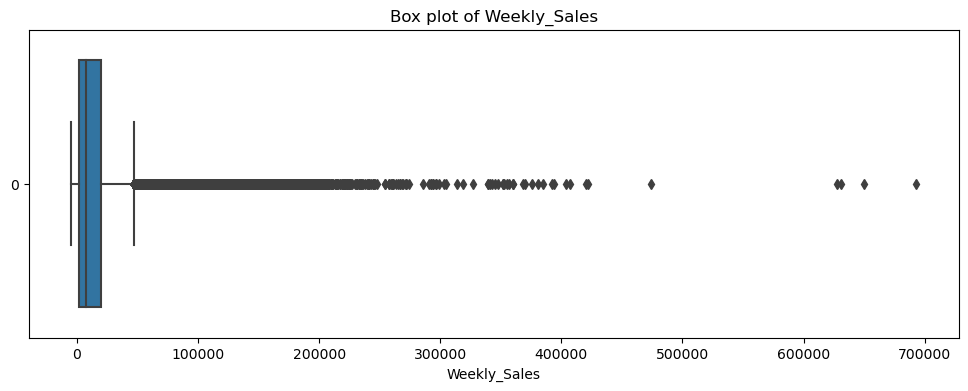

{'Low:': -127330.20619999997, 'Up:': 212993.26899999994}


In [49]:
low, up = low, up = outlier_thresholds(df, "Weekly_Sales")
print({"Low:":low, "Up:": up})

Weekly Sales değişkeninin neyi ifade ettiğini bildiğim için manuel olarak yorum yapabiliyorum.
0'dan küçük satış değerleri normal olmadığı için ve veriyi bozacağından kaldıracağım.
200000'den büyük değerleri de grafiklere bakınca outlier olarak görüyorum. Kaldıracağım.

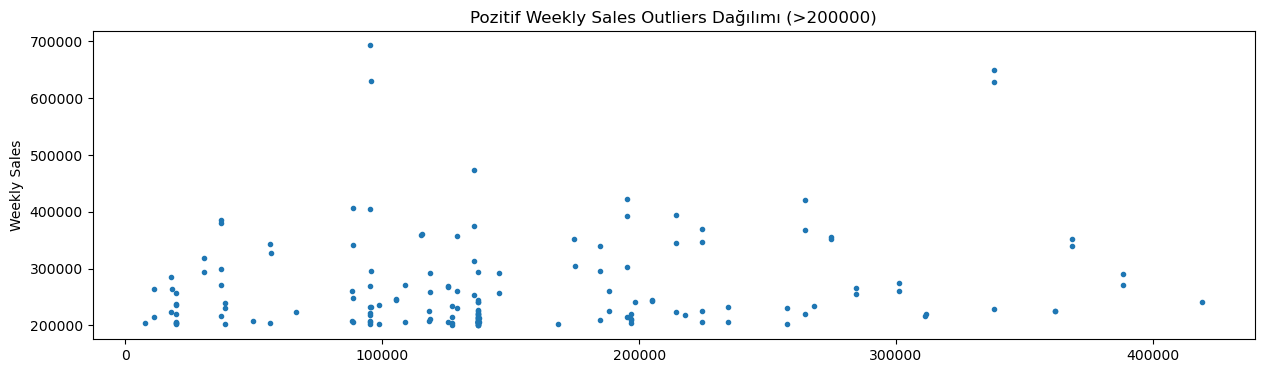

In [50]:
wsp_outliers = df.query('Weekly_Sales > 200000')
wsp_outliers['Weekly_Sales'].plot(figsize=(15, 4), style='.')
plt.ylabel('Weekly Sales')
plt.title('Pozitif Weekly Sales Outliers Dağılımı (>200000)')
plt.show()

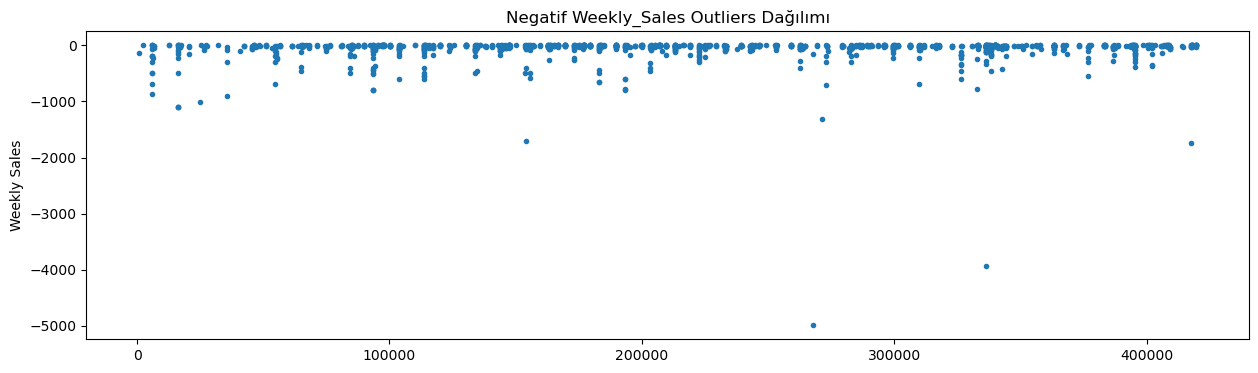

In [51]:
wsn_outliers = df.query('Weekly_Sales <= 0')
wsn_outliers['Weekly_Sales'].plot(figsize=(15, 4), style='.')
plt.ylabel('Weekly Sales')
plt.title('Negatif Weekly_Sales Outliers Dağılımı')
plt.show()

In [52]:
wsp_outliers.shape[0] +  wsn_outliers.shape[0]

1521

Belirlediğim outlier değerler verinin  %0.36'sını oluşturuyor. Yani silmek sorun olmaz.

In [53]:
df = df.query('Weekly_Sales >= 0 and Weekly_Sales < 200000')
df.shape

(420122, 22)

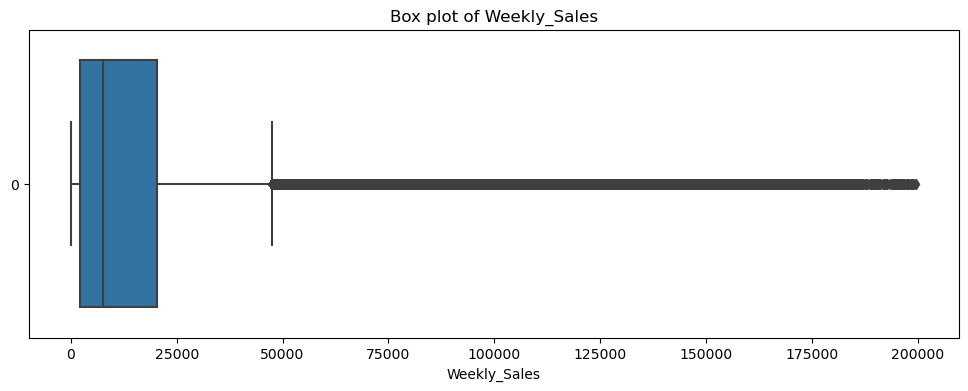

In [54]:
# yeni haline bakalım
plt.figure(figsize=(12,4))
sns.boxplot(df['Weekly_Sales'], orient='h')
plt.xlabel('Weekly_Sales')
plt.title('Box plot of Weekly_Sales')
plt.show()

***********************************

### YENİ ÖZELLİK ÇIKARIMI

Analizlerden çıkardığım sonuçlar doğrultusunda veri setimdeki değişkenleri kullanarak yeni değişkenler ekleyeceğim.

##### STORE VE DEPT DEĞİŞKENİ DÖNÜŞÜMÜ

In [55]:
# departman bazında ortalama satışlara göre düşük, normal, yüksek satışlı departman grupları oluşturalım.
dept_sales_avg = df.groupby('Dept')['Weekly_Sales'].mean().reset_index()
dept_sales_avg.columns = ['Dept', 'avg_weekly_sales']
dept_sales_avg['DeptGroup'] = pd.qcut(dept_sales_avg['avg_weekly_sales'], q=3, labels=[3, 2, 1])
df = df.merge(dept_sales_avg[['Dept', 'DeptGroup']], on='Dept', how='left')
df.tail()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5     CPI  Unemployment Type    Size  Day  Month  Year  WeekOfYear  WeekOfMonth  Quarter DeptGroup
420117     45    98 2012-09-28       508.370          0       64.880       3.997   4556.610     20.640      1.500   1601.010   3288.250 192.014         8.684    B  118221   28      9  2012          39            4        3         2
420118     45    98 2012-10-05       628.100          0       64.890       3.985   5046.740        NaN     18.820   2253.430   2340.010 192.170         8.667    B  118221    5     10  2012          40            1        4         2
420119     45    98 2012-10-12      1061.020          0       54.470       4.000   1956.280        NaN      7.890    599.320   3990.540 192.327         8.667    B  118221   12     10  2012          41            2        4         2
420120     45    98 2012-10-19       760.010          0       56.470       3.969   2004.020        NaN      3.180    437.730   1537.490 192.331         8.667    B  118221   19     10  2012          42            3        4         2
420121     45    98 2012-10-26      1076.800          0       58.850       3.882   4018.910     58.080    100.000    211.940    858.330 192.309         8.667    B  118221   26     10  2012          43            4        4         2

In [56]:
# mağazaları ortalama satışlarına göre 2 gruba ayıralım.
store_avg_sales = df.groupby('Store')['Weekly_Sales'].mean()
threshold = store_avg_sales.mean()
store_performance = store_avg_sales.apply(lambda x: 1 if x > threshold else 0)
df['StoreGroup'] = df['Store'].map(store_performance)
df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5     CPI  Unemployment Type    Size  Day  Month  Year  WeekOfYear  WeekOfMonth  Quarter DeptGroup  StoreGroup
0      1     1 2010-02-05     24924.500          0       42.310       2.572        NaN        NaN        NaN        NaN        NaN 211.096         8.106    A  151315    5      2  2010           5            1        1         1           1
1      1     1 2010-02-12     46039.490          1       38.510       2.548        NaN        NaN        NaN        NaN        NaN 211.242         8.106    A  151315   12      2  2010           6            2        1         1           1
2      1     1 2010-02-19     41595.550          0       39.930       2.514        NaN        NaN        NaN        NaN        NaN 211.289         8.106    A  151315   19      2  2010           7            3        1         1           1
3      1     1 2010-02-26     19403.540          0       46.630       2.561        NaN        NaN        NaN        NaN        NaN 211.320         8.106    A  151315   26      2  2010           8            4        1         1           1
4      1     1 2010-03-05     21827.900          0       46.500       2.625        NaN        NaN        NaN        NaN        NaN 211.350         8.106    A  151315    5      3  2010           9            1        1         1           1

In [57]:
df["DeptGroup"].value_counts()

DeptGroup
1    161965
2    159387
3     98770
Name: count, dtype: int64

In [58]:
df["StoreGroup"].value_counts()

StoreGroup
0    227798
1    192324
Name: count, dtype: int64

##### MARKDOWN DEĞİŞKENLERİNİN DÖNÜŞÜMÜ

MarkDown değişkenlerinden 'Markdown olup olmadığını' ifade eden HasMarkDown  ve 'Markdown değişkenlerindeki değerlerin toplamını' ifade eden TotalMarkDown değişkenlerini oluşturuyorum. 

In [60]:
df['HasMarkDown'] = df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].notnull().any(axis=1).astype(int)
df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5     CPI  Unemployment Type    Size  Day  Month  Year  WeekOfYear  WeekOfMonth  Quarter DeptGroup  StoreGroup  HasMarkDown
0      1     1 2010-02-05     24924.500          0       42.310       2.572        NaN        NaN        NaN        NaN        NaN 211.096         8.106    A  151315    5      2  2010           5            1        1         1           1            0
1      1     1 2010-02-12     46039.490          1       38.510       2.548        NaN        NaN        NaN        NaN        NaN 211.242         8.106    A  151315   12      2  2010           6            2        1         1           1            0
2      1     1 2010-02-19     41595.550          0       39.930       2.514        NaN        NaN        NaN        NaN        NaN 211.289         8.106    A  151315   19      2  2010           7            3        1         1           1            0
3      1     1 2010-02-26     19403.540          0       46.630       2.561        NaN        NaN        NaN        NaN        NaN 211.320         8.106    A  151315   26      2  2010           8            4        1         1           1            0
4      1     1 2010-03-05     21827.900          0       46.500       2.625        NaN        NaN        NaN        NaN        NaN 211.350         8.106    A  151315    5      3  2010           9            1        1         1           1            0

In [61]:
df[miss_cols] = df[miss_cols].fillna(0) # total markdown değerini hesaplamadan önce eksik değerleri 0 ile dolduruyorum.

In [62]:
df['TotalMarkDown'] = df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sum(axis=1)
df.tail()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5     CPI  Unemployment Type    Size  Day  Month  Year  WeekOfYear  WeekOfMonth  Quarter DeptGroup  StoreGroup  HasMarkDown  TotalMarkDown
420117     45    98 2012-09-28       508.370          0       64.880       3.997   4556.610     20.640      1.500   1601.010   3288.250 192.014         8.684    B  118221   28      9  2012          39            4        3         2           0            1       9468.010
420118     45    98 2012-10-05       628.100          0       64.890       3.985   5046.740      0.000     18.820   2253.430   2340.010 192.170         8.667    B  118221    5     10  2012          40            1        4         2           0            1       9659.000
420119     45    98 2012-10-12      1061.020          0       54.470       4.000   1956.280      0.000      7.890    599.320   3990.540 192.327         8.667    B  118221   12     10  2012          41            2        4         2           0            1       6554.030
420120     45    98 2012-10-19       760.010          0       56.470       3.969   2004.020      0.000      3.180    437.730   1537.490 192.331         8.667    B  118221   19     10  2012          42            3        4         2           0            1       3982.420
420121     45    98 2012-10-26      1076.800          0       58.850       3.882   4018.910     58.080    100.000    211.940    858.330 192.309         8.667    B  118221   26     10  2012          43            4        4         2           0            1       5247.260

*****************************************************************************

### YENİ ÖZELLİKLERİN ANALİZİ

In [63]:
new_columns= ['DeptGroup', 'StoreGroup', 'HasMarkDown', 'TotalMarkDown']

**VERİ SETİNDEKİ DAĞILIMLARI**

           DeptGroup  Ratio
DeptGroup                  
1             161965 38.552
2             159387 37.938
3              98770 23.510
********************************************


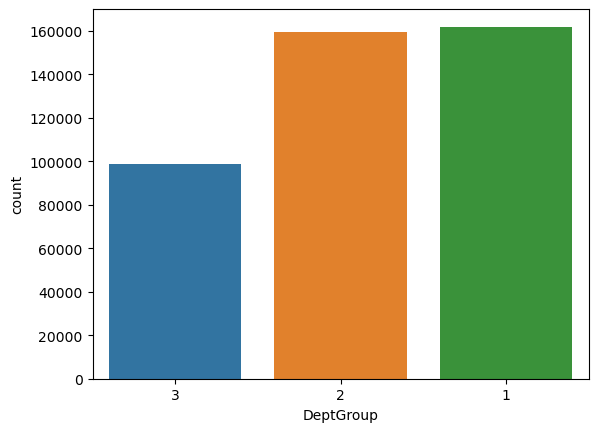

            StoreGroup  Ratio
StoreGroup                   
0               227798 54.222
1               192324 45.778
********************************************


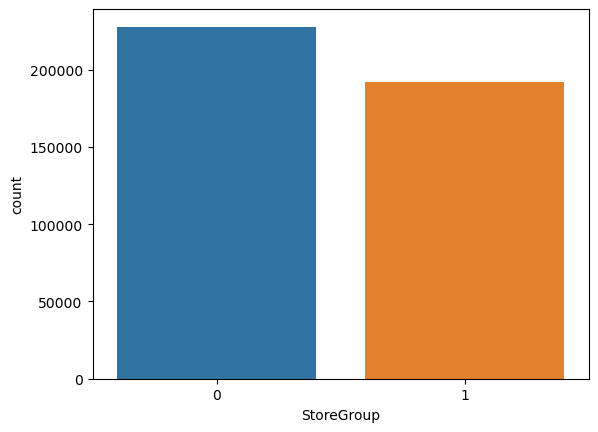

             HasMarkDown  Ratio
HasMarkDown                    
0                 269244 64.087
1                 150878 35.913
********************************************


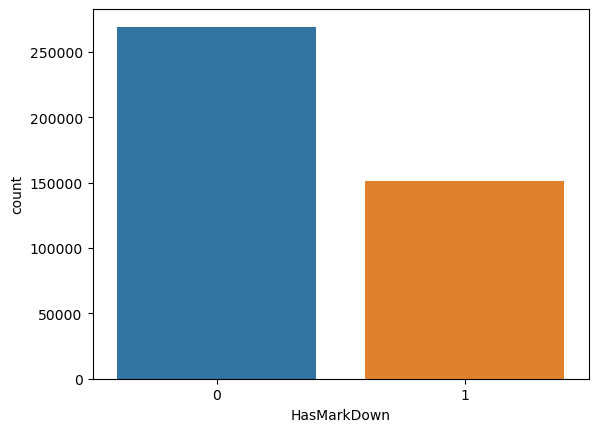

In [64]:
for col in df[new_columns].drop('TotalMarkDown',axis = 1):
    cat_summary(df, col, plot=True)

count   420122.000
mean      6678.766
std      14735.862
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%       4012.670
80%      11640.370
90%      20744.810
95%      33823.480
99%      70357.760
max     160510.610
Name: TotalMarkDown, dtype: float64


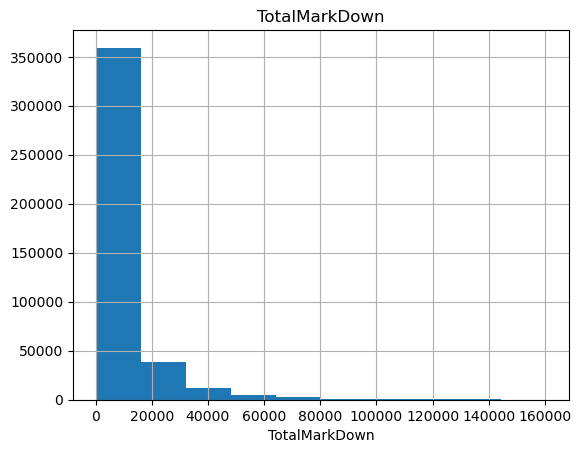

**************************************


In [65]:
num_summary(df, 'TotalMarkDown', plot=True)

**HEDEF DEĞİŞKEN ANALİZLERİ**

{'TARGET MEAN':            Weekly_Sales
DeptGroup              
3              2011.115
2              8742.969
1             31500.800}


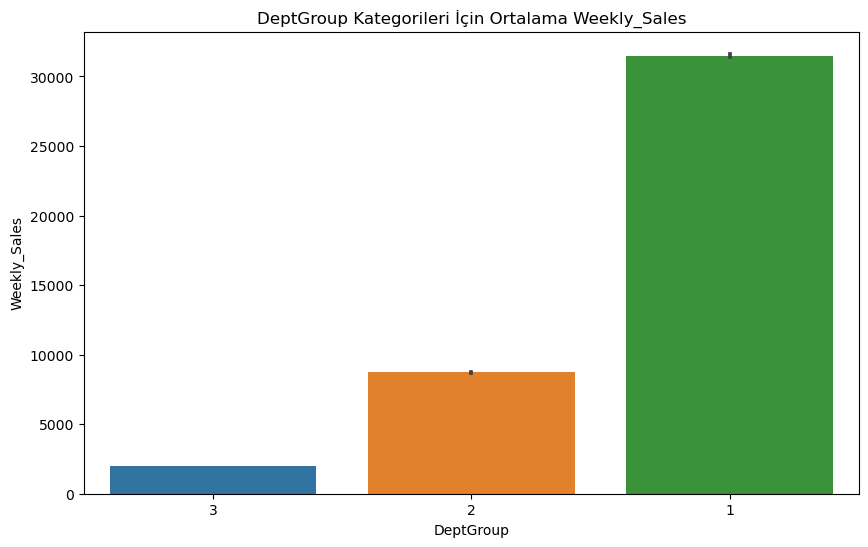

*******************************************


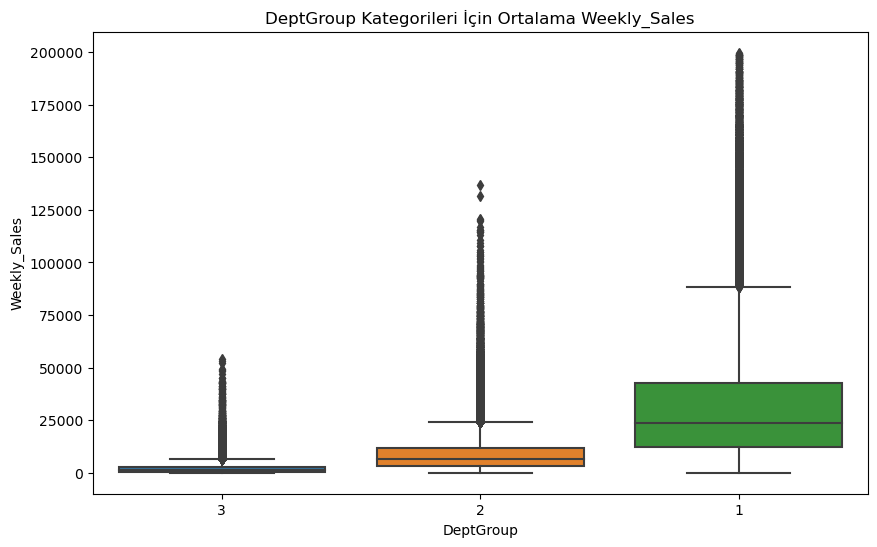

*******************************************


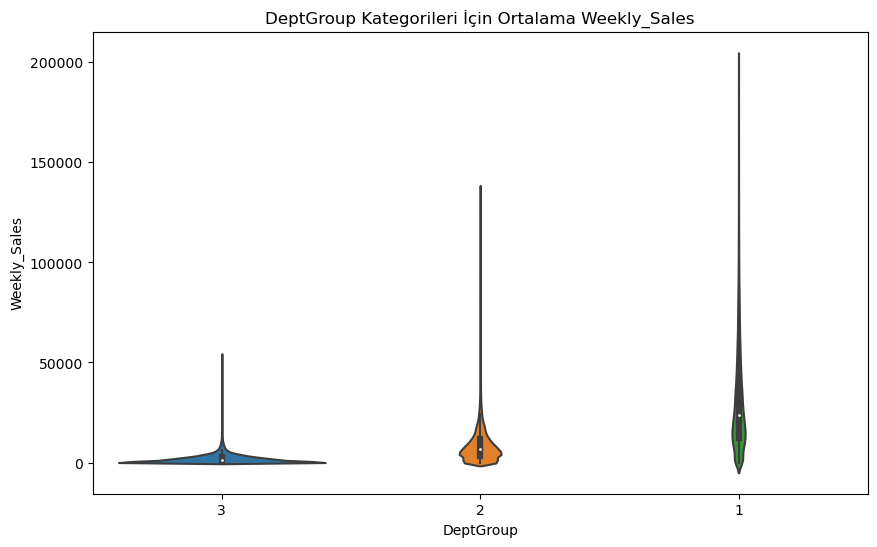

*******************************************


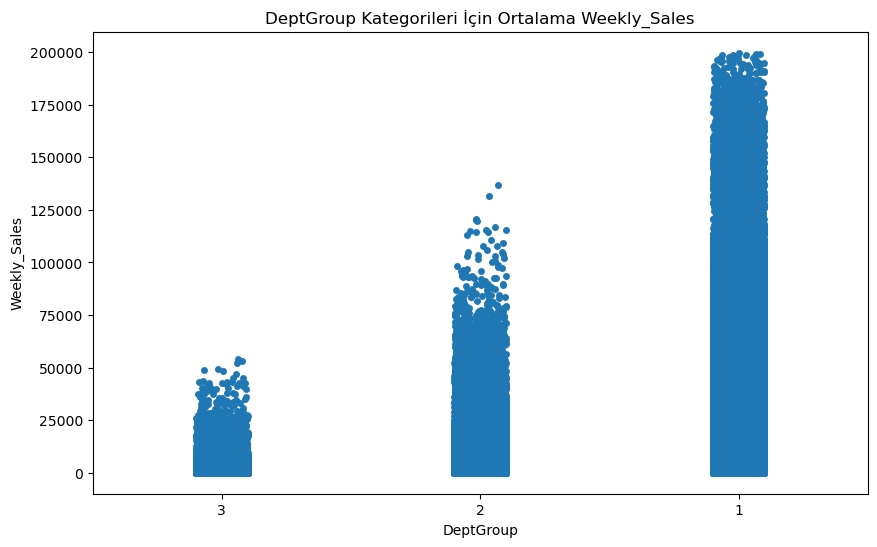

*******************************************
{'TARGET MEAN':             Weekly_Sales
StoreGroup              
0              10601.019
1              22250.419}


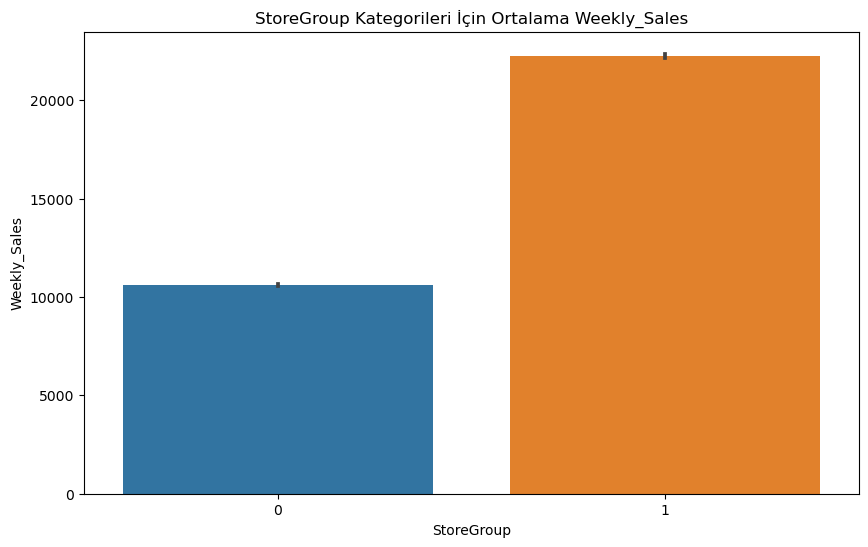

*******************************************


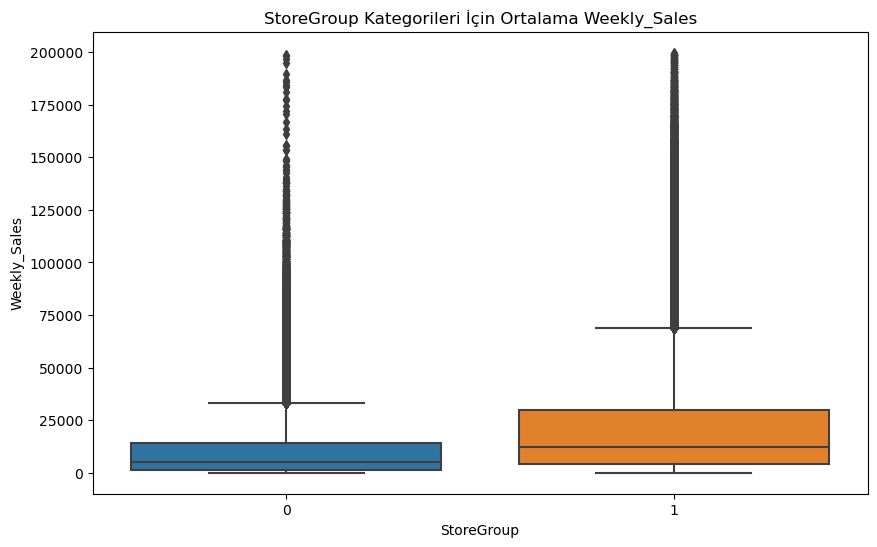

*******************************************


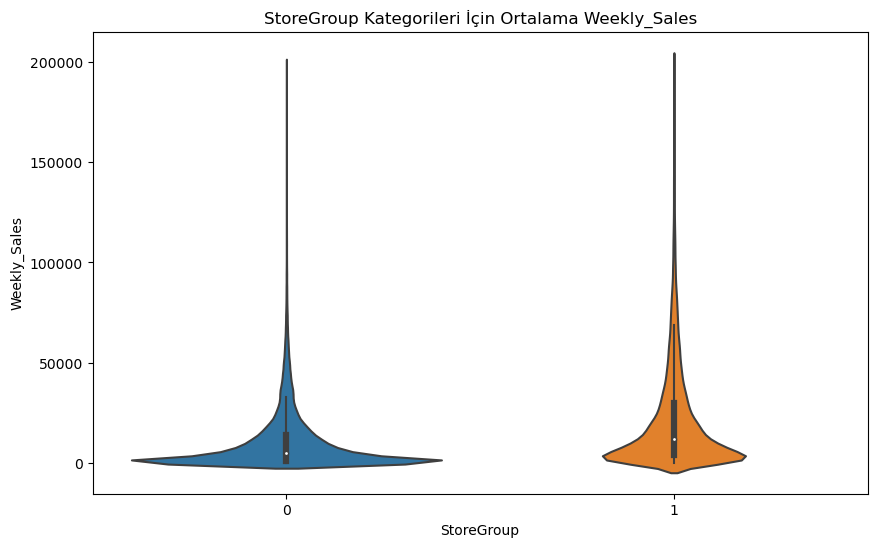

*******************************************


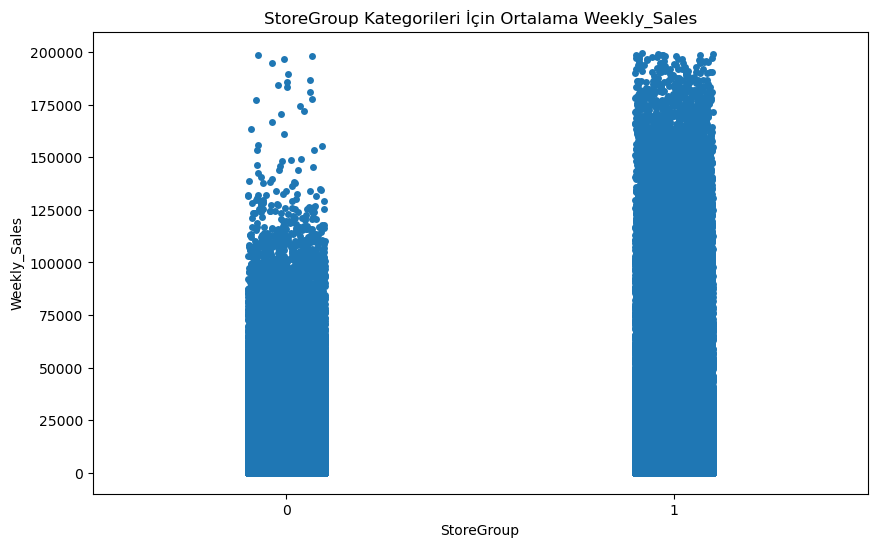

*******************************************
{'TARGET MEAN':              Weekly_Sales
HasMarkDown              
0               15832.690
1               16114.501}


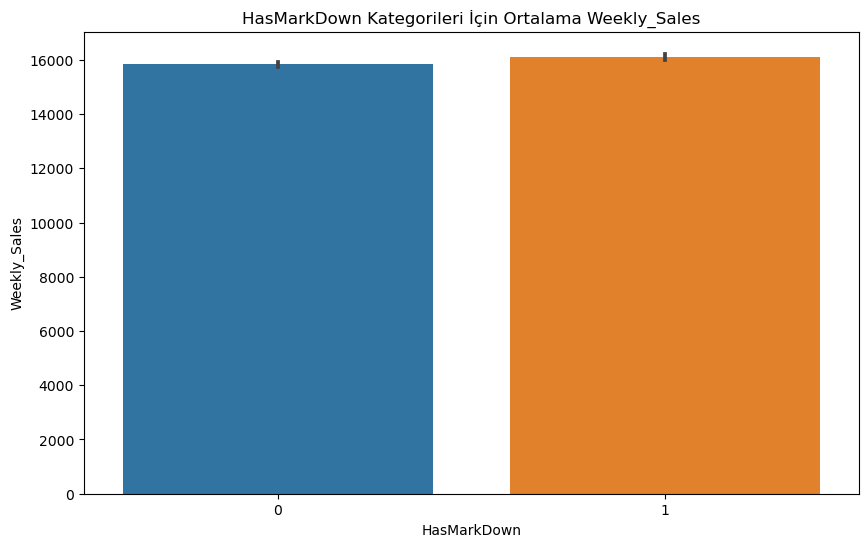

*******************************************


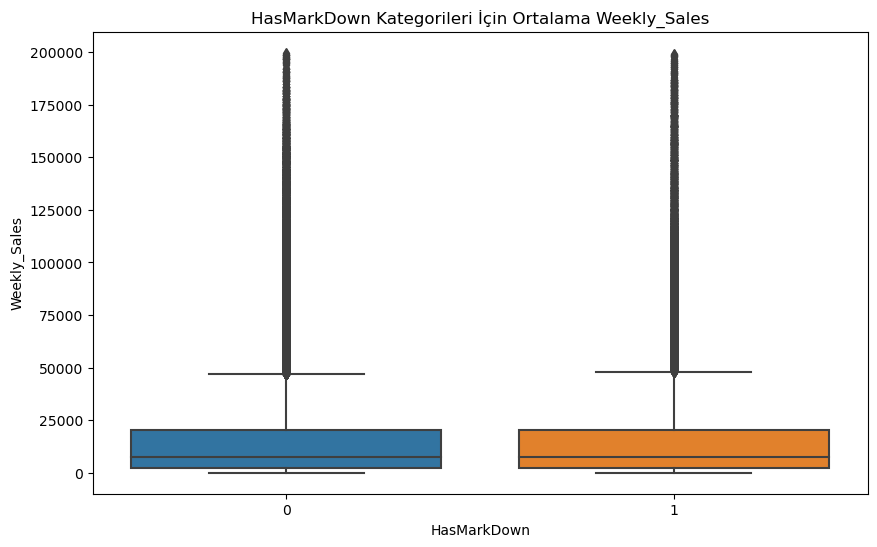

*******************************************


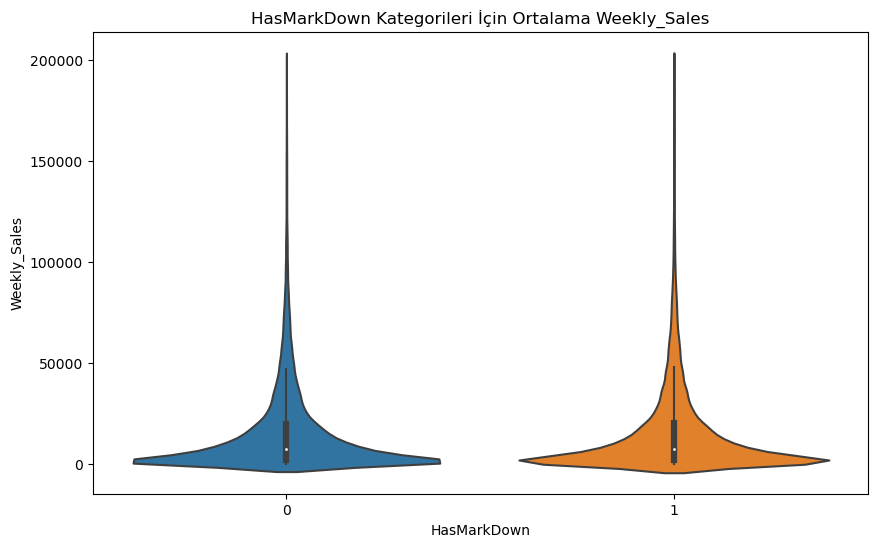

*******************************************


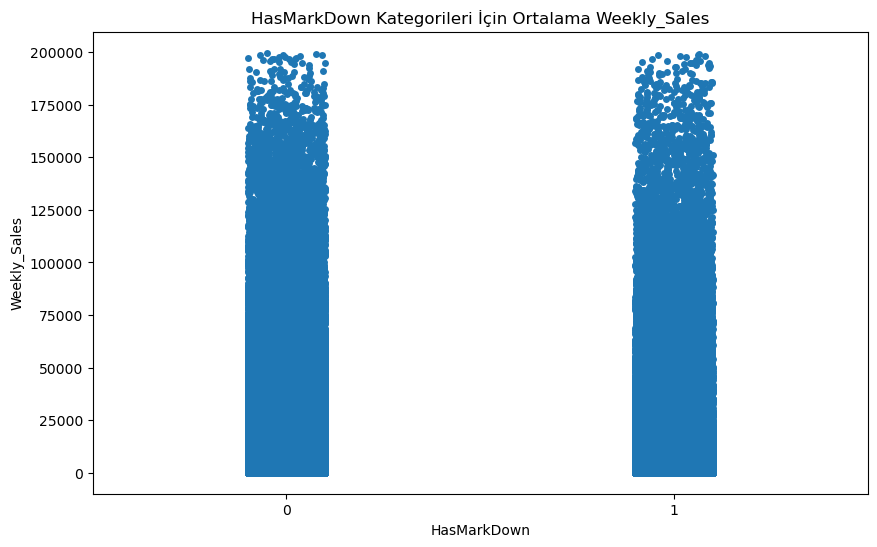

*******************************************


In [66]:
for col in df[new_columns].drop('TotalMarkDown',axis = 1):
    target_summary_with_cat(df,"Weekly_Sales", col, plot=True)

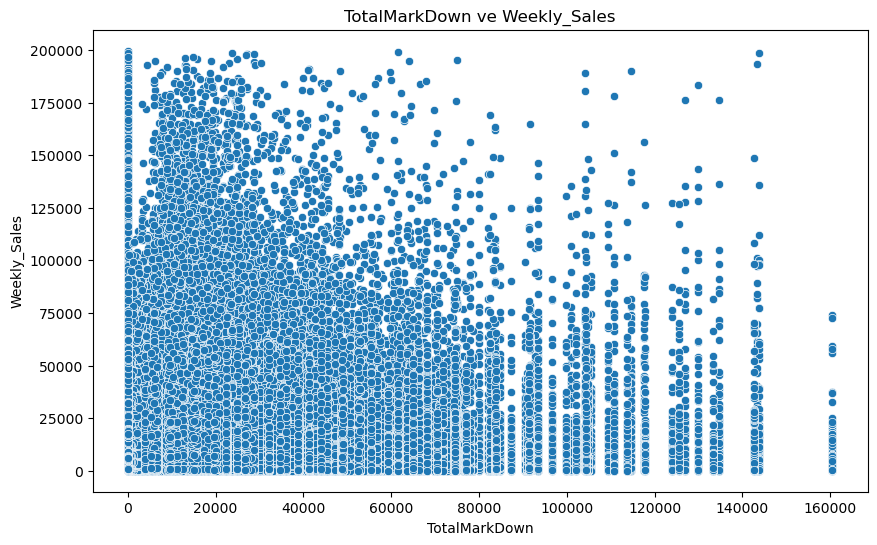

In [67]:
target_summary_with_num(df,"Weekly_Sales", 'TotalMarkDown', plot=True)

**AYKIRI DEĞER ANALİZLERİ**

Yeni oluşturduğum tek sayısal değişken TotalMarkDown. MarkDown değişkenlerindeki aykırılık bu değişkene de yansımış görünüyor.

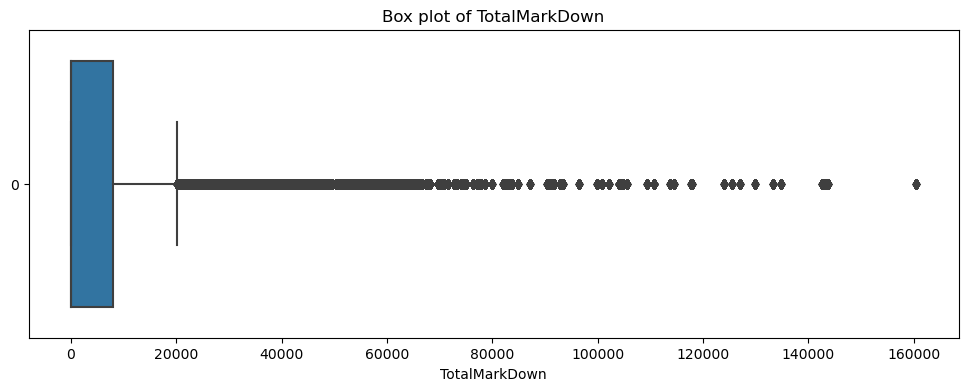

-83737.06499999999 139561.77499999997


In [69]:
low, up = low, up = outlier_thresholds(df, "TotalMarkDown")
print(low,up)

Fazla veri kaybı yaşamamak için manul olarak silme kararı aldım. Boxplot üzerinden silmek istediğim yere karar veriyorum.

In [70]:
tmd_outliers = df.query('TotalMarkDown > 85000 ')
tmd_outliers.shape

(2408, 26)

Çok büyük bir veri setim olduğu için 2408 adet veriyi gözden çıkarabilirim.

In [71]:
df = df.query('TotalMarkDown < 85000')
df.shape

(417714, 26)

In [72]:
# yeni haline bakalım
plt.figure(figsize=(12,4))
sns.boxplot(df['TotalMarkDown'], orient='h')
plt.xlabel('TotalMarkDown')
plt.title('Box plot of TotalMarkDown')
plt.show()

************************************************************************

### KORELASYON ANALİZİ

Şimdiye kadar var olan ve oluşturduğum tüm değişkenlerin korelasyonlarına bakıyorum.

In [74]:
df.info() # numerik tipte olmayan değişkenleri korelasyon matrisinde görebilmek için encode edeceğim.

<class 'pandas.core.frame.DataFrame'>
Index: 417714 entries, 0 to 420121
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          417714 non-null  int64         
 1   Dept           417714 non-null  int64         
 2   Date           417714 non-null  datetime64[ns]
 3   Weekly_Sales   417714 non-null  float64       
 4   IsHoliday      417714 non-null  int32         
 5   Temperature    417714 non-null  float64       
 6   Fuel_Price     417714 non-null  float64       
 7   MarkDown1      417714 non-null  float64       
 8   MarkDown2      417714 non-null  float64       
 9   MarkDown3      417714 non-null  float64       
 10  MarkDown4      417714 non-null  float64       
 11  MarkDown5      417714 non-null  float64       
 12  CPI            417714 non-null  float64       
 13  Unemployment   417714 non-null  float64       
 14  Type           417714 non-null  object        
 15  Size 

In [75]:
enc_cols= ['Type', 'DeptGroup']

In [76]:
for col in enc_cols:
    df= label_encoder(df, col)

In [77]:
drop_list = high_correlated_cols(df, plot=True)

In [78]:
drop_list

['Size',
 'WeekOfYear',
 'WeekOfMonth',
 'Quarter',
 'HasMarkDown',
 'TotalMarkDown']

**Özellik çıkarım aşamasını tamamladım. Bu aşamaya kadar yeni kolonlar oluşturdum, fazlalık (etkisiz ve korelasyonu yüksek) kolonları henüz silmedim. Lazım olması durumunda kullanabilmek için tüm değişkenlerin içinde olduğu verinin bu halini kaydediyorum.**

In [79]:
df.to_csv('walmart_all_columns.csv', index=False)

***************************************************************************

### SİLİNMESİ GEREKEN DEĞİŞKENLER

* **Korelasyon analizi sonucunda birbiriyle yüksek korelasyonlu değişkenleri silmek makine öğrenimi modelimizin performansını iyileştirecektir.** 
* **Kullanacağımız kolonlara karar verirken seçtiğimiz modelin ne olduğu da önemlidir.**
* **Değişkenler üzerinde makine öğrenimi sonucunda aldığımız sonuçlara göre düzenlemeler ve iyileştirmeler hala yapılabilir.**
* **Makine Öğrenimi esnasında aşağıdaki kod ile seçtiğimiz "drop_cols" değişkenlerini verimizden kaldırabiliriz. Örneğin:**

In [80]:
drop_cols= ['Size','Date','Store', 'Dept', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Day', 'Month', 'Year', 'WeekOfYear']
new_df= df.drop(drop_cols,axis = 1)
new_df.head()

Weekly_Sales  IsHoliday  Temperature  Fuel_Price     CPI  Unemployment  Type  WeekOfMonth  Quarter  DeptGroup  StoreGroup  HasMarkDown  TotalMarkDown
0     24924.500          0       42.310       2.572 211.096         8.106     0            1        1          0           1            0          0.000
1     46039.490          1       38.510       2.548 211.242         8.106     0            2        1          0           1            0          0.000
2     41595.550          0       39.930       2.514 211.289         8.106     0            3        1          0           1            0          0.000
3     19403.540          0       46.630       2.561 211.320         8.106     0            4        1          0           1            0          0.000
4     21827.900          0       46.500       2.625 211.350         8.106     0            1        1          0           1            0          0.000

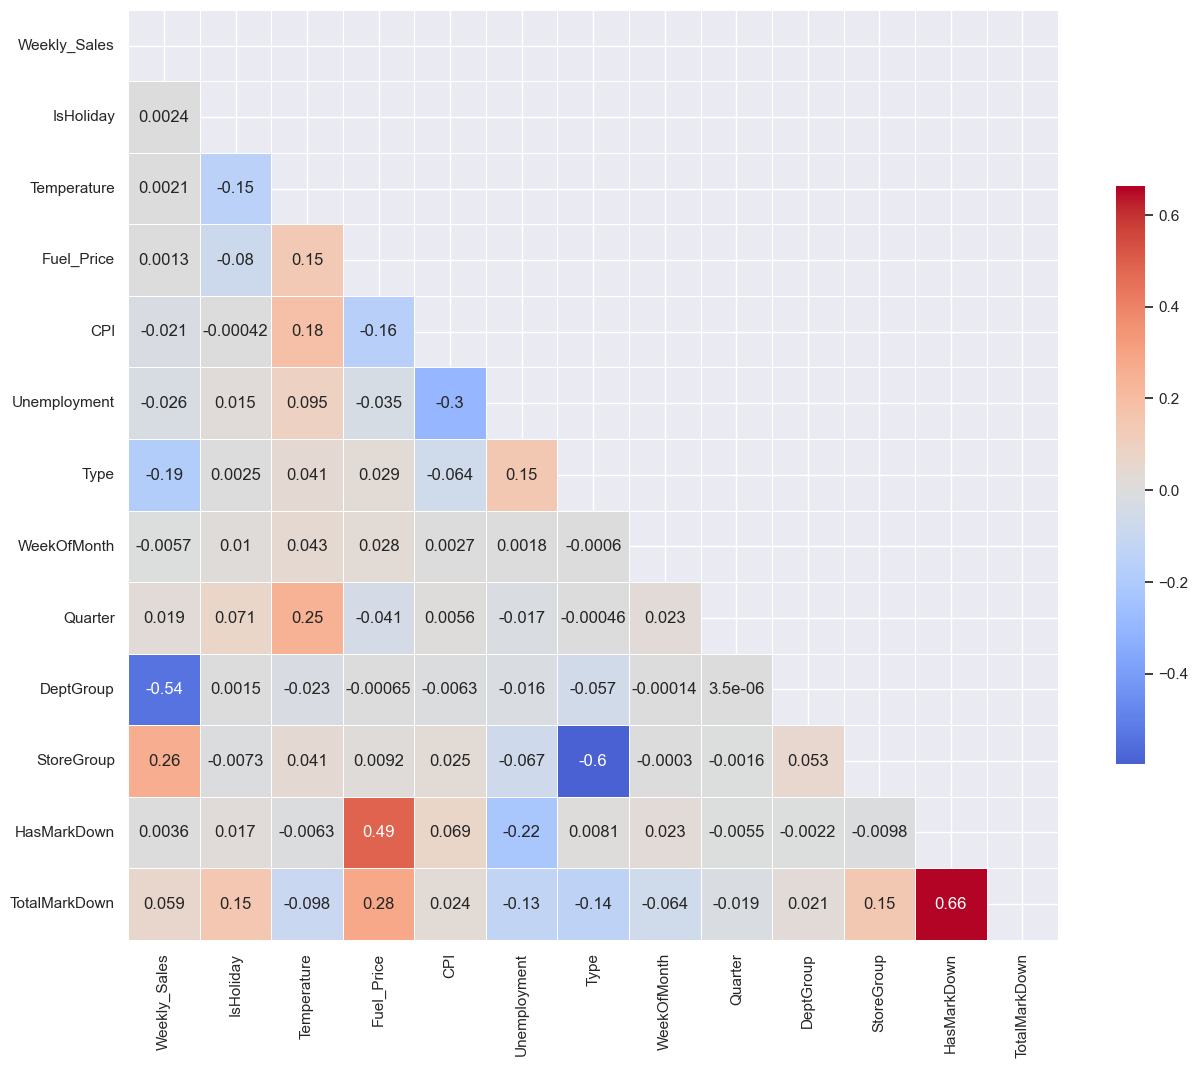

[]

In [81]:
high_correlated_cols(new_df, plot=True)